### Here we plot the predicted change in sea-ice thickness between two decades for the SSP2-4.5 (control) and ARISE-SAI (feedback). We also plot the difference between the two groups to see how effective SAI is in maintaining sea-ice thickness compared to a world without SAI. This analysis is done with all 10 ensemble members by finding the ensemble mean.

In [1]:
 # analysis
import io
import os
import sys
import warnings
import numpy as np
import xarray as xr
import pandas as pd
# for calculations and masking regions
import numpy as np
import numpy.ma as ma

# for making figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.path as mpath

# for making maps
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature

workingdir = '/Users/dpathak/Desktop/REU/notebooks/'   
dataDir = '/Users/dpathak/Desktop/REU/data/Cicethickness/'
figuredir = '/Users/dpathak/Desktop/REU/figures/IceFrac, IceThic/'
ens = ['001','002','003','004','005','006','007','008','009','010']
   
   
   
#### read data
# make empty dictionaries to hold all ensemble members
iceThicknessCONTROL  = {} ##will have all monthly data, ungrouped
iceThicknessFEEDBACK = {}
iceThicknessFEEDBACKGrouped = {} ##will have annual means per ensemble member
iceThicknessCONTROLGrouped = {}
# loop through each file and store in dictionary
for ensNum in range(len(ens)):
    ## ARISE
    ds = xr.open_dataset(dataDir +
                             'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.' + str(ens[ensNum]) +
                             '.cice.h.sithick.203501-206912_NH.nc')
    # get the correct time stamp since xarray has trouble reading it
    ds['time'] = pd.date_range(start=pd.to_datetime("2035-01-01"),
                                               periods=ds.sizes['time'], freq='MS')
    latIce = ds.lat; lonIce = ds.lon
    # print(ds.keys()) #did this to find the name of the variable I want,i.e.,sithick
    iceThicknessFEEDBACK[ens[ensNum]] =ds.sithick
    ds.close()
       
    ## SSP
    ds = xr.open_dataset(dataDir +
                             'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.' + str(ens[ensNum]) +
                             '.cice.h.sithick.201501-206912_NH.nc')
    ds['time'] = pd.date_range(start=pd.to_datetime("2015-01-01"),
                                               periods=ds.sizes['time'], freq='MS')
    iceThicknessCONTROL[ens[ensNum]] = ds.sithick
    ds.close()
    iceThicknessFEEDBACKGrouped[ens[ensNum]] = iceThicknessFEEDBACK[ens[ensNum]].groupby('time.year').mean(dim='time', skipna = True)
    iceThicknessCONTROLGrouped[ens[ensNum]] = iceThicknessCONTROL[ens[ensNum]].groupby('time.year').mean(dim='time', skipna = True)
    #I think this gives me yearly means for each ensemble member, NOT THE WHOLE ENSEMBLE MEAN.
#iceThicknessFEEDBACKGrouped[ens[0]]

In [2]:
###TRIAL: I think this gives me decadal WHOLE ENSEBMLE MEANS for control and feedback since I didn't specify
#an ensNum; It should be finding the mean over all ensNums for those decades!! -- is this right or is this
#decadal mean for each ensNum, or some particular ensNum?

# iceThicknessFEEDBACKmean_20352044 = np.mean(iceThicknessFEEDBACKGrouped[ens[ensNum]][:10, :, :], axis = 0)
# iceThicknessFEEDBACKmean_20552064 = np.mean(iceThicknessFEEDBACKGrouped[ens[ensNum]][20:30, :, :], axis = 0)
# iceThicknessCONTROLmean_20352044 = np.mean(iceThicknessCONTROLGrouped[ens[ensNum]][20:30, :, :], axis = 0)
# iceThicknessCONTROLmean_20552064 = np.mean(iceThicknessCONTROLGrouped[ens[ensNum]][40:50, :, :], axis = 0)
# #print(iceThicknessCONTROLmean_20552064[0])
#mean = iceThicknessFEEDBACKmean_20352044.mean(dim ='year', skipna = True)
#iceThicknessFEEDBACKGrouped[ens[ensNum]][:10, :, :] #shows it's taking one ensemble member, not all 10!!

###NEED A LOOP TO GET DECADAL MEANS OF ENSEMBLE SINCE THE ABOVE DIDN'T WORK
counter1 = 0 ##defining some variables that will be updated in the loop
counter2 = 0 ##without them the mean values aren't added for each ensNum, only overwritten in the loop!
counter3 = 0 
counter4 = 0
counter5 = 0
counter6 = 0
ts1 = 0
ts2 = 0
for ensNum in range(len(ens)): 
    counter1 = counter1 + np.mean(iceThicknessFEEDBACKGrouped[ens[ensNum]][:10, :, :], axis = 0)
#counter value gets updated everytime in the loop for different ensNum value and is stored in iceThicknessFEEDBACK_20352044
    iceThicknessFEEDBACK_20352044 = counter1
    counter2 = counter2 + np.mean(iceThicknessFEEDBACKGrouped[ens[ensNum]][20:30, :, :], axis = 0)
    iceThicknessFEEDBACK_20552064 = counter2
    #adding one more decade
    counter5 = counter5 + np.mean(iceThicknessFEEDBACKGrouped[ens[ensNum]][10:20, :, :], axis = 0)
    iceThicknessFEEDBACK_20452054 = counter5
    ts1 = ts1 + iceThicknessFEEDBACKGrouped[ens[ensNum]] #for timeseries
    counter3 = counter3 + np.mean(iceThicknessCONTROLGrouped[ens[ensNum]][20:30, :, :], axis = 0)
    iceThicknessCONTROL_20352044 = counter3
    counter4 = counter4 + np.mean(iceThicknessCONTROLGrouped[ens[ensNum]][40:50, :, :], axis = 0)
    iceThicknessCONTROL_20552064 = counter4
    #adding one more decade
    counter6 = counter6 + np.mean(iceThicknessCONTROLGrouped[ens[ensNum]][30:40, :, :], axis = 0)
    iceThicknessCONTROL_20452054 = counter6
    ts2 = ts2 + iceThicknessCONTROLGrouped[ens[ensNum]]
    #DECADAL ENSEMBLE MEANS
iceThicknessFEEDBACKmean_20352044 = (iceThicknessFEEDBACK_20352044)/10 #adding means in the loop 
iceThicknessFEEDBACKmean_20552064 = (iceThicknessFEEDBACK_20552064)/10 #is not the same as total mean
iceThicknessCONTROLmean_20352044 = (iceThicknessCONTROL_20352044)/10   #so we divide by 10 to get
iceThicknessCONTROLmean_20552064 = (iceThicknessCONTROL_20552064)/10   #DECADAL ENSEMBLE MEANS
#adding a decade
iceThicknessFEEDBACKmean_20452054 = iceThicknessFEEDBACK_20452054/10
iceThicknessCONTROLmean_20452054 = iceThicknessCONTROL_20452054/10
ARISETSdata = ts1/10 #yearly ensMean = 35
SSPTSdata = ts2/10 #55
# print(np.min(iceThicknessFEEDBACKmean_20352044))
# print("-----")
# print(np.min(iceThicknessFEEDBACKmean_20552064))
# print("-----")
# print(np.min(iceThicknessCONTROLmean_20352044))
# print("-----")
# print(np.min(iceThicknessCONTROLmean_20552064))

In [3]:
#getting three differences for 3 plots
iceThicknessFEEDBACKDiff_20552064_20352044 = iceThicknessFEEDBACKmean_20552064 - iceThicknessFEEDBACKmean_20352044
iceThicknessCONTROLDiff_20552064_20352044 = iceThicknessCONTROLmean_20552064 - iceThicknessCONTROLmean_20352044
iceThicknessCONTROL_FEEDBACK_Diff_20552064_20352044 = iceThicknessCONTROLDiff_20552064_20352044 - iceThicknessFEEDBACKDiff_20552064_20352044
iceThicknessCONTROL_FEEDBACK_Diff_20552064_20352044.shape
print(np.min(iceThicknessFEEDBACKDiff_20552064_20352044))
print(np.min(iceThicknessCONTROLDiff_20552064_20352044))

<xarray.DataArray 'sithick' ()>
array(-0.66378055)
<xarray.DataArray 'sithick' ()>
array(-1.43808476)


In [4]:
#3 decadal differences between SSP and ARISE
icethicSSP_ARISE_203544 = iceThicknessCONTROLmean_20352044 - iceThicknessFEEDBACKmean_20352044
icethicSSP_ARISE_204554 = iceThicknessCONTROLmean_20452054 - iceThicknessFEEDBACKmean_20452054
icethicSSP_ARISE_205564 = iceThicknessCONTROLmean_20552064 - iceThicknessFEEDBACKmean_20552064
print(np.max(icethicSSP_ARISE_203544))

<xarray.DataArray 'sithick' ()>
array(0.43564062)


In [5]:
#plotting
def make_maps(var,latitude,longitude,vmins,vmaxs,mycmap,label,title,savetitle):
    # Add cyclic point
    var,lonIce = add_cyclic_point(var,coord=longitude)
    
    # Create figure
    fig = plt.figure(figsize=(8,5))
    if vmins < 0. and vmins > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
        
    # Create North Pole Stereo projection map, circle boundary
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
    ax.set_extent([180, -180, 50, 90], crs=ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_facecolor('0.98')
    
    cf1 = ax.pcolormesh(lonIce,latitude,var,transform=ccrs.PlateCarree(), 
                  norm=norm, cmap=mycmap)
    ax.coastlines(linewidth=0.8)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'black', facecolor = 'black'))
    if vmins < 0.:
        # if subplots:
        #     cbar_ax = fig.add_axes([0.1,0.04,0.8,0.035])
        #     cbar = plt.colorbar(cf1, ax=cbar_ax, extend="both")
        # else:
            cbar = plt.colorbar(cf1, ax=ax, extend="both", orientation = 'horizontal')
    else:
        # if subplots:
        #     cbar_ax = fig.add_axes([0.1,0.04,0.8,0.035])
        #     cbar = plt.colorbar(cf1, ax=cbar_ax, extend="both")
        # else:
            cbar = plt.colorbar(cf1, ax=ax, extend="max", orientation = 'horizontal')
    cbar.set_label(str(label), fontsize=12)
    plt.title(str(title), fontsize=13)
    plt.savefig(figuredir + str(savetitle) + '.jpg', dpi=1000, bbox_inches='tight')
    return fig, ax

-1.9830800180164627 0.45671687262896654
-1.43808476124638 0.3310344333676576
-0.6637805471746095 0.649646284878338
-1.9830800180164627
-1.9830800180164627 0.649646284878338


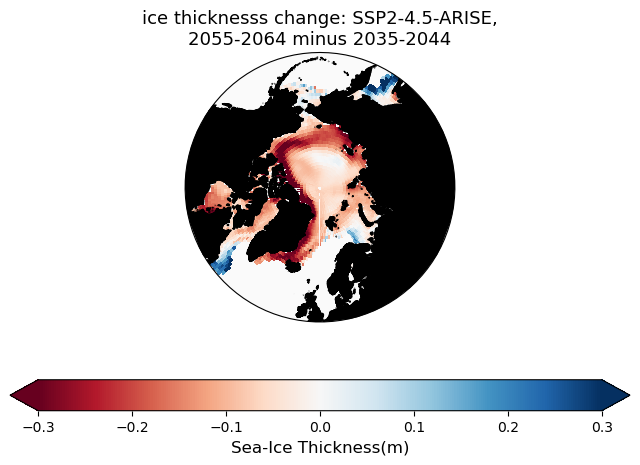

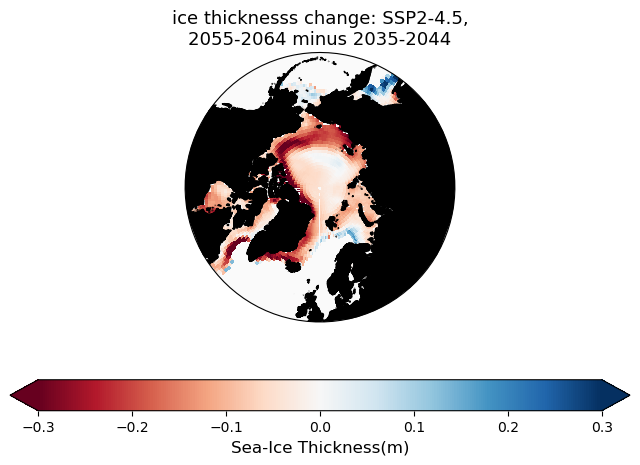

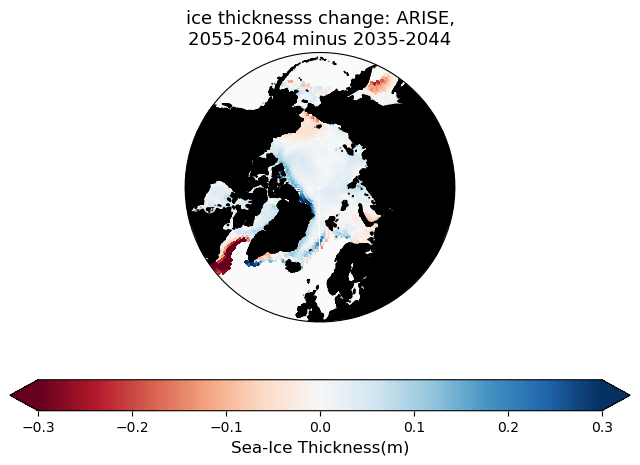

In [6]:
#control-feedback plot
vmin = np.nanmin(iceThicknessCONTROL_FEEDBACK_Diff_20552064_20352044)
vmax = np.nanmax(iceThicknessCONTROL_FEEDBACK_Diff_20552064_20352044)
print(vmin, vmax)

#control plot
vmincontrol = np.nanmin(iceThicknessCONTROLDiff_20552064_20352044)
vmaxcontrol = np.nanmax(iceThicknessCONTROLDiff_20552064_20352044)
print(vmincontrol, vmaxcontrol)

#feedback plot
vminfeedback = np.nanmin(iceThicknessFEEDBACKDiff_20552064_20352044)
vmaxfeedback = np.nanmax(iceThicknessFEEDBACKDiff_20552064_20352044)
print(vminfeedback, vmaxfeedback)

vmin1 = min(vmin, vmincontrol, vminfeedback)
print(vmin)
vmax1 = max(vmax, vmaxcontrol, vmaxfeedback)
print(vmin1, vmax1)
vminnew = -0.3
vmaxnew = 0.3
# To get a nice colorbar, vmin and vmax should be negative and positive values of the same number
# if np.abs(vmin1) > vmax1: vmax1 = np.abs(vmin1)
# elif vmax1 > np.abs(vmin1): vmin1 = vmax1*(-1)

warnings.simplefilter("ignore")
fig, ax = make_maps(iceThicknessCONTROL_FEEDBACK_Diff_20552064_20352044,latIce,lonIce,vminnew,vmaxnew,'RdBu','Sea-Ice Thickness(m)','ice thicknesss change: SSP2-4.5-ARISE,\n2055-2064 minus 2035-2044',
           'ssp245_ensALL_2m_ice_thic_change_20552064-20352044')
fig, ax = make_maps(iceThicknessCONTROLDiff_20552064_20352044,latIce,lonIce,vminnew,vmaxnew,'RdBu','Sea-Ice Thickness(m)','ice thicknesss change: SSP2-4.5,\n2055-2064 minus 2035-2044',
           'ssp245_ensALL_2m_ice_thic_change_20552064-20352044')
fig, ax = make_maps(iceThicknessFEEDBACKDiff_20552064_20352044,latIce,lonIce,vminnew, vmaxnew,'RdBu','Sea-Ice Thickness(m)','ice thicknesss change: ARISE,\n2055-2064 minus 2035-2044',
           'ssp245_ensALL_2m_ice_thic_change_20552064-20352044')

In the first map, the colors indicate that the difference in ice thickness in non-SAI vs SAI conditions is mostly red, i.e., decreased thickness. It can be interpreted as how much worse the ice thickness gets in SSP2-4.5 compared to SAI. Mathematically:
   del(control) - del(feedback) < 0
  so, del(control) < del(feedback) -
This is what we expect since del(control) must be a negative number larger in magnitude than del(feedback).

We see that vmin is a much larger negative number in magnitude and vmax is a smaller positive number for control than feedback. The feedback map shows when SAI is applied, there is very little ice thickness change in the Arctic except some decrease near Greenland. ---OCEAN CURRENTS MAYBE?
The control map shows more red regions i.e, reduced ice thickness while the feedback map is mostly very slightly blue.


CONCLUSION: SAI appears to prevent reduction in sea-ice thickness!

### DECADAL: Plotting ARISE and SSP ice thickness in both decades individually and the difference between the decades:

In [7]:
#ARISE PLOTS
def subplots(ax, var, latitude, lonIce, norm, i, mycmap, namedictARISE):
    var,lonIce = add_cyclic_point(var,coord=lonIce)
    ax.set_extent([180, -180, 50, 90], crs=ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_facecolor('0.98')
    
    cf1 = ax.pcolormesh(lonIce,latIce,var,transform=ccrs.PlateCarree(), 
                  norm=norm, cmap=mycmap)
    ax.coastlines(linewidth=0.8)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'black', facecolor = 'black'))
    ax.set_title(str(namedictARISE))
    plt.savefig(figuredir + str(namedictARISE) + '.jpg', dpi=1000, bbox_inches='tight')
    return cf1

<xarray.DataArray 'sithick' ()>
array(3.89337923)

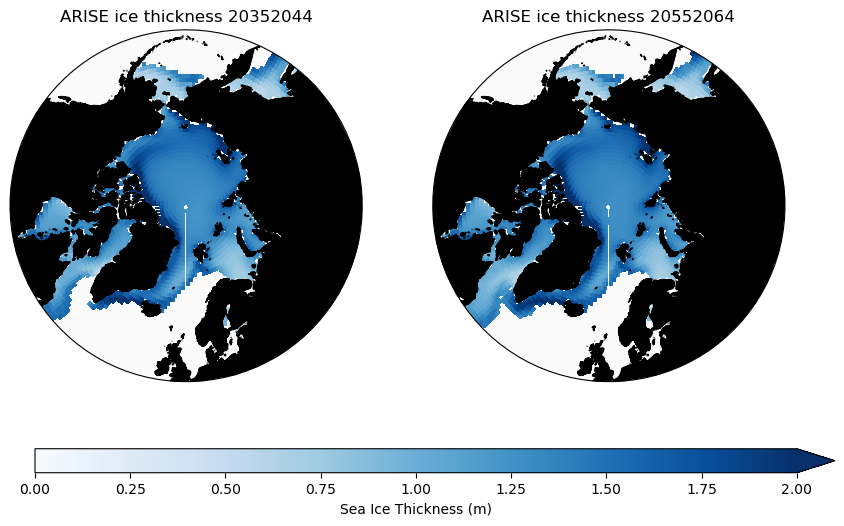

In [8]:
fig = plt.figure(figsize =(10,6))
cols = 2; rows =1 
vmins = 0
vmaxs = vmins + 2
newdict1 = {}
newdict1[0] = iceThicknessFEEDBACKmean_20352044
newdict1[1] = iceThicknessFEEDBACKmean_20552064
# newdict1[2] = iceThicknessFEEDBACKDiff_20552064_20352044
namedictARISE = {}
namedictARISE[0] = ('ARISE ice thickness 20352044')
namedictARISE[1] = ('ARISE ice thickness 20552064')
# namedictARISE[2] = ('ARISE ice thickness difference')
for i in range(1, cols*rows+1):
    if np.nanmin(newdict1[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues'
    if vmins < 0. and vmaxs > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, newdict1[i-1], latIce, lonIce, norm, i, mycmap, namedictARISE[i-1])
cbar_ax = fig.add_axes([0.15, 0.05, 0.8, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal', extend="max")
cbar.set_label('Sea Ice Thickness (m)', fontsize = 10)
plt.savefig(figuredir + str(namedictARISE) + '.jpg', dpi=1000, bbox_inches='tight')
np.max(iceThicknessFEEDBACKmean_20552064)

In [9]:
#SSP PLOTS
def subplots(ax, var, latitude, lonIce, norm, i, mycmap, namedictSSP):
    var,lonIce = add_cyclic_point(var,coord=lonIce)
    ax.set_extent([180, -180, 50, 90], crs=ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_facecolor('0.98')
    
    cf1 = ax.pcolormesh(lonIce,latIce,var,transform=ccrs.PlateCarree(), 
                  norm=norm, cmap=mycmap)
    ax.coastlines(linewidth=0.8)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'black', facecolor = 'black'))
    ax.set_title(str(namedictSSP))
    plt.savefig(figuredir + str(namedictSSP) + '.jpg', dpi=1000, bbox_inches='tight')
    return cf1

<xarray.DataArray 'sithick' ()>
array(3.82384936)

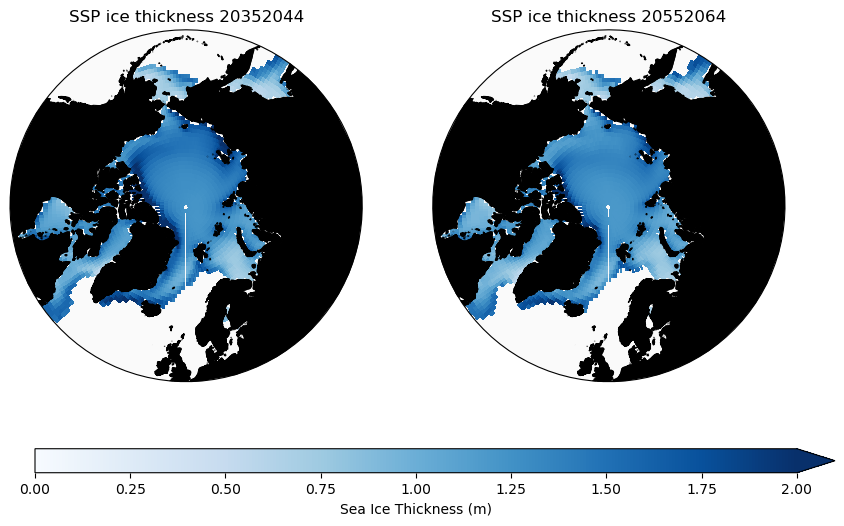

In [10]:
fig = plt.figure(figsize =(10,6))
cols = 2; rows =1 
vmins = 0
vmaxs = vmins + 2
newdict2 = {}
newdict2[0] = iceThicknessCONTROLmean_20352044
newdict2[1] = iceThicknessCONTROLmean_20552064
# newdict2[2] = iceThicknessCONTROLDiff_20552064_20352044
namedictSSP = {}
namedictSSP[0] = ('SSP ice thickness 20352044')
namedictSSP[1] = ('SSP ice thickness 20552064')
# namedictSSP[2] = ('SSP ice thickness difference')
for i in range(1, cols*rows+1):
    if np.nanmin(newdict2[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues'
    if vmins < 0. and vmaxs > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, newdict2[i-1], latIce, lonIce, norm, i, mycmap, namedictSSP[i-1])
cbar_ax = fig.add_axes([0.15, 0.05, 0.8, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal', extend="max")
cbar.set_label('Sea Ice Thickness (m)', fontsize = 10)
plt.savefig(figuredir + str(namedictSSP) + '.jpg', dpi=1000, bbox_inches='tight')
np.max(iceThicknessCONTROLmean_20352044)

In [11]:
#DIFFERENCE MAPS SSP-ARISE TOGETHER
def subplots(ax, var, latitude, lonIce, norm, i, mycmap, namedict):
    var,lonIce = add_cyclic_point(var,coord=lonIce)
    ax.set_extent([180, -180, 50, 90], crs=ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_facecolor('0.98')
    
    cf1 = ax.pcolormesh(lonIce,latIce,var,transform=ccrs.PlateCarree(), 
                  norm=norm, cmap=mycmap)
    ax.coastlines(linewidth=0.8)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'black', facecolor = 'black'))
    ax.set_title(str(namedict))
    plt.savefig(figuredir + str(namedict) + '.jpg', dpi=1000, bbox_inches='tight')
    return cf1

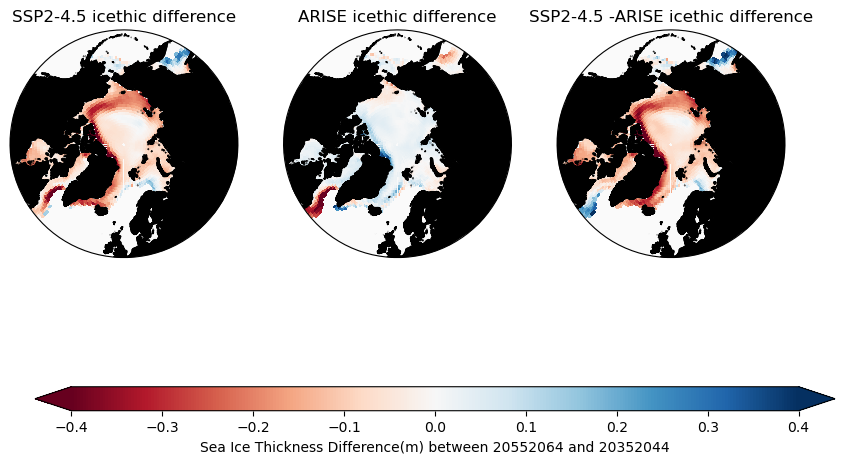

In [12]:
fig = plt.figure(figsize =(10,6))
cols = 3; rows =1 
vmins = -0.4
vmaxs = np.abs(vmins)
newdict = {}
newdict[0] = iceThicknessCONTROLDiff_20552064_20352044
newdict[1] = iceThicknessFEEDBACKDiff_20552064_20352044
newdict[2] = iceThicknessCONTROL_FEEDBACK_Diff_20552064_20352044
namedict = {}
namedict[0] = ('SSP2-4.5 icethic difference')
namedict[1] = ('ARISE icethic difference')
namedict[2] = ('SSP2-4.5 -ARISE icethic difference')
for i in range(1, cols*rows+1):
    if np.nanmin(newdict[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues'
    if vmins < 0. and vmaxs > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, newdict[i-1], latIce, lonIce, norm, i, mycmap, namedict[i-1])
cbar_ax = fig.add_axes([0.15, 0.05, 0.8, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal', extend = 'both')
cbar.set_label('Sea Ice Thickness Difference(m) between 20552064 and 20352044', fontsize = 10)
plt.savefig(figuredir + str(namedict) + '.jpg', dpi=1000, bbox_inches='tight')


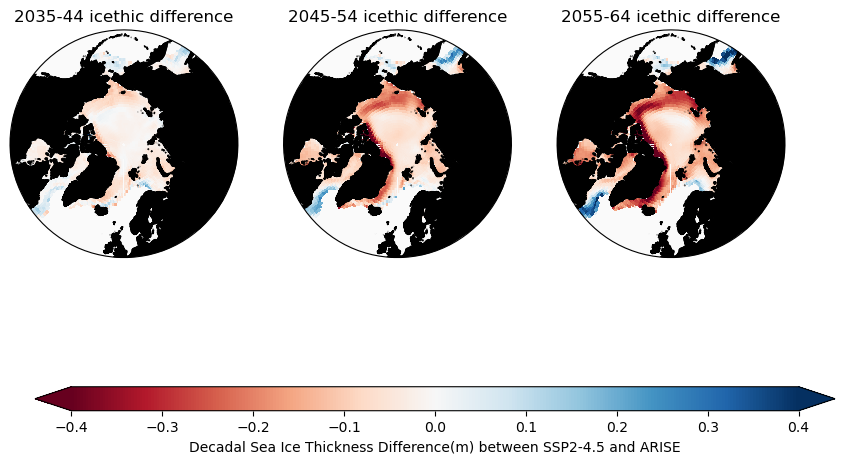

In [13]:
#SSP-ARISE FOR 3 DECADES
fig = plt.figure(figsize =(10,6))
cols = 3; rows =1 
vmins = -0.4
vmaxs = np.abs(vmins)
newdict271 = {}
newdict271[0] = icethicSSP_ARISE_203544
newdict271[1] = icethicSSP_ARISE_204554
newdict271[2] = icethicSSP_ARISE_205564
namedict271 = {}
namedict271[0] = ('2035-44 icethic difference')
namedict271[1] = ('2045-54 icethic difference')
namedict271[2] = ('2055-64 icethic difference')
for i in range(1, cols*rows+1):
    if np.nanmin(newdict271[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues'
    if vmins < 0. and vmaxs > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, newdict271[i-1], latIce, lonIce, norm, i, mycmap, namedict271[i-1])
cbar_ax = fig.add_axes([0.15, 0.05, 0.8, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal', extend = 'both')
cbar.set_label('Decadal Sea Ice Thickness Difference(m) between SSP2-4.5 and ARISE', fontsize = 10)
plt.savefig(figuredir + str(namedict) + '.jpg', dpi=1000, bbox_inches='tight')

### SEPTEMBER: Now we look at September only instead of the entire year, because we expect least ice-thickness and most shipping in September.

In [14]:
#We go by the same method but pick out only september means instead of the whole year!
#pick out the first and last decade months from original data and then choose september
#since I want all ensemble members, I need a loop again
#for both decades: 2035-2044 and 2055-2064
random1 = 0
random2 = 0
random3 = 0
random4 = 0
random5 = 0
random6 = 0
ts1 = 0
ts2 = 0
for ensNum in range(len(ens)):
    #for 2035-2044
    random1= random1 + iceThicknessFEEDBACK[ens[ensNum]][:120, :, :] #I think this adds monthly means together
    iceThicknessFEEDBACK_20352044 = random1                          #so i should divide by 10 in the end to get
    random2 = random2 + iceThicknessCONTROL[ens[ensNum]][240:360, :, :] #120 monthly ensemble means
    iceThicknessCONTROL_20352044 = random2                            
    #for 2055-2064
    random3 = random3 + iceThicknessFEEDBACK[ens[ensNum]][240:360, :, :]
    iceThicknessFEEDBACK_20552064 = random3
    random4 = random4 + iceThicknessCONTROL[ens[ensNum]][480:600, :, :]
    iceThicknessCONTROL_20552064 = random4
    #adding a decade: 2045-2054
    random5 = random5 + iceThicknessFEEDBACK[ens[ensNum]][120:240, :, :]
    iceThicknessFEEDBACK_20452054 = random5
    random6 = random6 + iceThicknessCONTROL[ens[ensNum]][360:480, :, :]
    iceThicknessCONTROL_20452054 = random6    
    ts1 = ts1 + iceThicknessFEEDBACK[ens[ensNum]]
    ts2 = ts2 + iceThicknessCONTROL[ens[ensNum]]
    ##I divide by 10 first for 10 ensNum
iceThicknessFEEDBACKmean1_20352044 = (iceThicknessFEEDBACK_20352044)/10
iceThicknessCONTROLmean1_20352044 = (iceThicknessCONTROL_20352044)/10
iceThicknessFEEDBACKmean1_20552064 = (iceThicknessFEEDBACK_20552064)/10
iceThicknessCONTROLmean1_20552064 = (iceThicknessCONTROL_20552064)/10
iceThicknessFEEDBACKmean1_20452054 = iceThicknessFEEDBACK_20452054/10
iceThicknessCONTROLmean1_20452054 = iceThicknessCONTROL_20452054/10


ts1new = ts1/10
ts2new = ts2/10
# print(ts1new)
    ###now i have 120 monthly ensemble means
    #i.e. the ensemble mean for each month of the 2 decades -- i.e. 10 september means
    ###now i group by month and find 12 monthly ensemble means
    #print(iceThicknessCONTROLmean1_20552064)
iceThicknessFEEDBACKMonthlyEnsMean_20352044 = iceThicknessFEEDBACKmean1_20352044.groupby('time.month').mean(dim = 'time', skipna = True)
iceThicknessFEEDBACKMonthlyEnsMean_20552064 = iceThicknessFEEDBACKmean1_20552064.groupby('time.month').mean(dim = 'time', skipna = True)
iceThicknessCONTROLMonthlyEnsMean_20352044 = iceThicknessCONTROLmean1_20352044.groupby('time.month').mean(dim = 'time', skipna = True)
iceThicknessCONTROLMonthlyEnsMean_20552064 = iceThicknessCONTROLmean1_20552064.groupby('time.month').mean(dim = 'time', skipna = True)
iceThicknessFEEDBACKMonthlyEnsMean_20452054 = iceThicknessFEEDBACKmean1_20452054.groupby('time.month').mean(dim = 'time', skipna = True)
iceThicknessCONTROLMonthlyEnsMean_20452054 = iceThicknessCONTROLmean1_20452054.groupby('time.month').mean(dim = 'time', skipna = True)
ts1Monthlymeans = ts1new.groupby('time.month')
ts2Monthlymeans = ts2new.groupby('time.month')
# print(ts1Monthlymeans)
#want September only
#print(len(iceThicknessCONTROLMonthlyEnsMean_20552064)) -- is 12
iceThicknessFEEDBACKsept_20352044 = iceThicknessFEEDBACKMonthlyEnsMean_20352044[8]
iceThicknessFEEDBACKsept_20552064 = iceThicknessFEEDBACKMonthlyEnsMean_20552064[8]
iceThicknessCONTROLsept_20352044 = iceThicknessCONTROLMonthlyEnsMean_20352044[8]
iceThicknessCONTROLsept_20552064 = iceThicknessCONTROLMonthlyEnsMean_20552064[8]
iceThicknessFEEDBACKsept_20452054 = iceThicknessFEEDBACKMonthlyEnsMean_20452054[8]
iceThicknessCONTROLsept_20452054 = iceThicknessCONTROLMonthlyEnsMean_20452054[8]
TS_sspSept = ts2Monthlymeans[9]
TS_ariseSept = ts1Monthlymeans[9]
# TS_sspSept
iceThicknessFEEDBACKsept_20352044
# ts2Monthlymeans
# iceThicknessCONTROLsept_20452054

<xarray.DataArray 'sithick' (lat: 42, lon: 288)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan, 1.40085455, 1.40307716, ..., 1.39428223, 1.3992259 ,
        1.39441167],
       [       nan,        nan, 1.2543918 , ..., 1.2353663 , 1.25285738,
               nan],
       [       nan,        nan,        nan, ..., 1.13797132, 1.13366019,
               nan]])
Coordinates:
  * lat      (lat) float64 50.42 51.36 52.3 53.25 ... 86.23 87.17 88.12 89.06
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    month    int64 9

In [15]:
#picking months for JASO timeseries
JASOarraySSP = ts2new.sel(time=ts2new[:,:,:].time.dt.month.isin([7,8,9,10]))
JASOarrayARISE = ts1new.sel(time=ts1new[:,:,:].time.dt.month.isin([7,8,9,10]))
#JASO mean every year
JASOmeanSSP = JASOarraySSP.groupby('time.year').mean(dim='time', skipna = True)
JASOmeanARISE = JASOarrayARISE.groupby('time.year').mean(dim='time', skipna = True)
JASOmeanARISE

<xarray.DataArray 'sithick' (year: 35, lat: 42, lon: 288)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan, 0.98659803, 0.97726152, ..., 1.00447495,
         1.0058147 , 0.97489267],
        [       nan,        nan, 0.9073381 , ..., 0.90575227,
         0.92546862,        nan],
        [       nan,        nan,        nan, ..., 0.89126403,
         0.88212736,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan, 1.36094637, 1.35284578, ..., 1.38468842,
         1.37931393, 1.37117842],
        [       nan,        nan, 1.33924946, ..., 1.35688611,
         1.35411095,        nan],
        [       nan,        nan,        nan, ..., 1.32481312,
         1.32425442,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan, 1.27389687, 1.27571251, ..., 1.25684339,
         1.26276666, 1.27039073],
        [       nan,        nan, 1.28099696, ..., 1.26573822,
         1.27206628,        nan],
        [       nan,        nan,        nan, ..., 1.26668249,
         1.27309858,        nan]]])
Coordinates:
  * lat      (lat) float64 50.42 51.36 52.3 53.25 ... 86.23 87.17 88.12 89.06
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * year     (year) int64 2035 2036 2037 2038 2039 ... 2065 2066 2067 2068 2069

In [16]:
#finding difference in september ice thickness betweeen two decades
#control i.e. SSP
iceThicknessCONTROLseptDiff = iceThicknessCONTROLsept_20552064 - iceThicknessCONTROLsept_20352044
#feedback i.e. ARISE
iceThicknessFEEDBACKseptDiff = iceThicknessFEEDBACKsept_20552064 - iceThicknessFEEDBACKsept_20352044
#between control and feedback
iceThicknessseptDiff_Control_Feedback = iceThicknessCONTROLseptDiff - iceThicknessFEEDBACKseptDiff
iceThicknessseptDiff_Control_Feedback.shape

(42, 288)

In [17]:
#finding 3 decadal SSP-ARISE differences:
SSP_ARISEsept203544 = iceThicknessCONTROLsept_20352044 - iceThicknessFEEDBACKsept_20352044
SSP_ARISEsept204554 = iceThicknessCONTROLsept_20452054 - iceThicknessFEEDBACKsept_20452054
SSP_ARISEsept205564 = iceThicknessCONTROLsept_20552064 - iceThicknessFEEDBACKsept_20552064
np.min(SSP_ARISEsept205564)

<xarray.DataArray 'sithick' ()>
array(-1.84481465)
Coordinates:
    month    int64 9

In [18]:
##commented out because i want 3 graphs side by side: see next code blocks:
#now plotting 3 graphs
def make_maps(var,latitude,longitude,vmins,vmaxs,mycmap,label,title,savetitle):
    # Add cyclic point
    var,lonIce = add_cyclic_point(var,coord=longitude)
    
    # Create figure
    fig = plt.figure(figsize=(8,5))
    if vmins < 0. and vmins > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
        
# Create 3 North Pole Stereo projection maps, circle boundary
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
    # ax2 = fig.add_subplot(1, 3, 2, projection=ccrs.NorthPolarStereo())
    # ax3 = fig.add_subplot(1, 3, 3, projection=ccrs.NorthPolarStereo())
#for plot1
    ax.set_extent([180, -180, 50, 90], crs=ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_facecolor('0.98')
    
    cf1 = ax.pcolormesh(lonIce,latitude,var,transform=ccrs.PlateCarree(), 
                  norm=norm, cmap=mycmap)
    ax.coastlines(linewidth=0.8)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'black', facecolor = 'black'))

    if vmins < 0.:
        cbar = plt.colorbar(cf1, ax=ax, extend="both", orientation = 'horizontal')
    else:
        cbar = plt.colorbar(cf1, ax=ax, extend="max", orientation = 'horizontal')
    cbar.set_label(str(label), fontsize=12)
    plt.title(str(title), fontsize=13)
    plt.savefig(figuredir + str(savetitle) + '.jpg', dpi=1000, bbox_inches='tight')
    return fig, ax


-1.8969245899625329 1.514683502416892
-1.2248457046992791 1.4630644159430257
-0.7816167839411117 0.7836354182515374
-1.8969245899625329
1.514683502416892


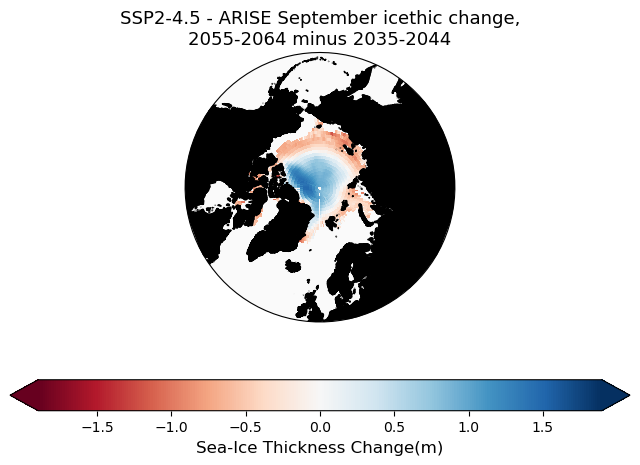

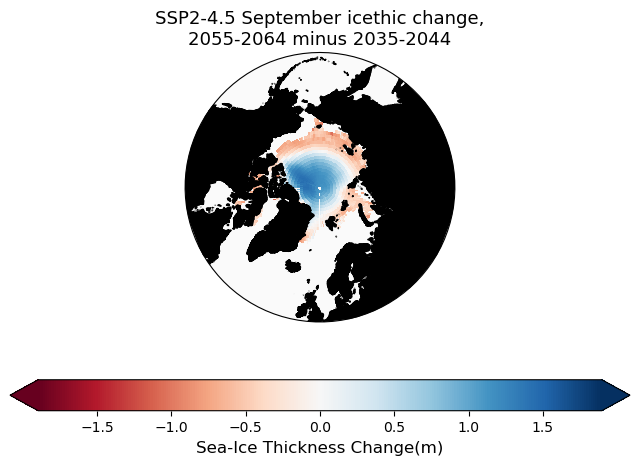

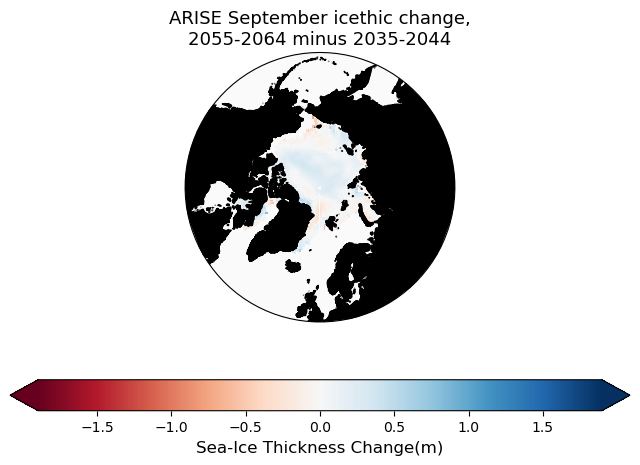

In [19]:
#for control-feedback plot
vmin1 = np.nanmin(iceThicknessseptDiff_Control_Feedback)
vmax1 = np.nanmax(iceThicknessseptDiff_Control_Feedback)
print(vmin1, vmax1)

#for control plot
vmin2 = np.nanmin(iceThicknessCONTROLseptDiff)
vmax2 = np.nanmax(iceThicknessCONTROLseptDiff)
print(vmin2, vmax2)

#for feedback plot
vmin3 = np.nanmin(iceThicknessFEEDBACKseptDiff)
vmax3 = np.nanmax(iceThicknessFEEDBACKseptDiff)
print(vmin3, vmax3)

vmin = min(vmin1, vmin2, vmin3)
print(vmin)
vmax = max(vmax1, vmax2, vmax3)
print(vmax)

#To get a nice colorbar, vmin and vmax should be negative and positive values of the same number
if np.abs(vmin) > vmax: vmax = np.abs(vmin)
elif vmax > np.abs(vmin): vmin = vmax*(-1)

warnings.simplefilter("ignore")
fig, ax = make_maps(iceThicknessseptDiff_Control_Feedback,latIce,lonIce,vmin,vmax,'RdBu','Sea-Ice Thickness Change(m)','SSP2-4.5 - ARISE September icethic change,\n2055-2064 minus 2035-2044',
           'ssp245_ens1_2m_ice_thic_change_sept_20552064-20352044')
fig, ax = make_maps(iceThicknessCONTROLseptDiff,latIce,lonIce,vmin,vmax,'RdBu','Sea-Ice Thickness Change(m)','SSP2-4.5 September icethic change,\n2055-2064 minus 2035-2044',
           'ssp245_ens1_2m_ice_thic_change_sept_control_20552064-20352044')
fig, ax = make_maps(iceThicknessFEEDBACKseptDiff,latIce,lonIce,vmin,vmax,'RdBu','Sea-Ice Thickness Change(m)','ARISE September icethic change,\n2055-2064 minus 2035-2044',
           'ssp245_ens1_2m_ice_thic_change_sept_feedback_20552064-20352044')

We see that ARISE has very little positive and negative changes in sea-ice thickness, while SSP shows increase in thickness in future in central Arctic and decrease in thickness surrounding the center.
CONCLUSION: ARISE appears to avoid large anomalies in sea-ice thickness compared to SSP.

In [20]:
import geopandas as gpd

In [21]:
fname = r'/Users/dpathak/Desktop/REU/data/Shipping_and_Hydrography/Arctic_Sea_Routes.shp'
shapes = gpd.read_file(fname)
shippingRoutes = shapes.loc[:, 'geometry']

In [44]:
#ARISE PLOTS
def subplots(ax, var, latitude, lonIce, norm, i, mycmap, namedictARISEsept):
    var,lonIce = add_cyclic_point(var,coord=lonIce)
    ax.set_extent([180, -180, 50, 90], crs=ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_facecolor('0.5')
    
    cf1 = ax.pcolormesh(lonIce,latIce,var,transform=ccrs.PlateCarree(), 
                  norm=norm, cmap=mycmap)
    ax.coastlines(linewidth=0.8)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'black', facecolor = 'black'))
    ax.set_title(str(namedictARISEsept))
    plt.savefig(figuredir + str(namedictARISEsept) + '.jpg', dpi=1000, bbox_inches='tight')
    return cf1


<xarray.DataArray 'sithick' ()>
array(3.36773584)
Coordinates:
    month    int64 9
<xarray.DataArray 'sithick' ()>
array(3.65587956)
Coordinates:
    month    int64 9


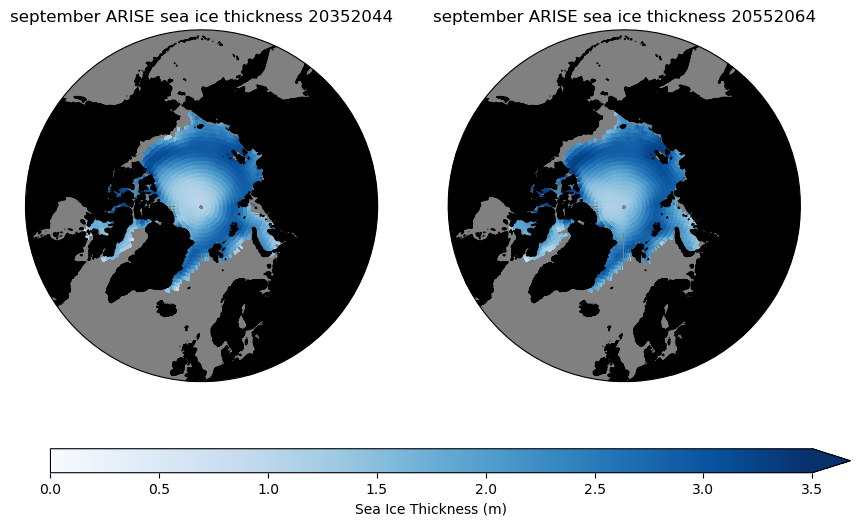

In [45]:
fig = plt.figure(figsize =(10,6))
cols = 2; rows =1 
vmins = 0
vmaxs = vmins + 3.5
newdict3 = {}
newdict3[0] = iceThicknessFEEDBACKsept_20352044
newdict3[1] = iceThicknessFEEDBACKsept_20552064
# newdict3[2] = iceThicknessFEEDBACKseptDiff
namedictARISEsept = {}
namedictARISEsept[0] = ('september ARISE sea ice thickness 20352044')
namedictARISEsept[1] = ('september ARISE sea ice thickness 20552064')
# namedictARISEsept[2] = ('sept ARISE cicethic difference')
for i in range(1, cols*rows+1):
    if np.nanmin(newdict1[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues'
    if vmins < 0. and vmaxs > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, newdict3[i-1], latIce, lonIce, norm, i, mycmap, namedictARISEsept[i-1])
cbar_ax = fig.add_axes([0.15, 0.05, 0.8, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal', extend ='max')
cbar.set_label('Sea Ice Thickness (m)', fontsize = 10)
print(np.max(iceThicknessFEEDBACKsept_20352044))
print(np.max(iceThicknessFEEDBACKsept_20552064))

In [24]:
#SSP PLOTS
def subplots(ax, var, latitude, lonIce, norm, i, mycmap, namedictSSPsept):
    var,lonIce = add_cyclic_point(var,coord=lonIce)
    ax.set_extent([180, -180, 50, 90], crs=ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_facecolor('0.98')
    
    cf1 = ax.pcolormesh(lonIce,latIce,var,transform=ccrs.PlateCarree(), 
                  norm=norm, cmap=mycmap)
    ax.coastlines(linewidth=0.8)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'black', facecolor = 'black'))
    ax.set_title(str(namedictSSPsept))
    plt.savefig(figuredir + str(namedictSSPsept) + '.jpg', dpi=1000, bbox_inches='tight')
    return cf1

<xarray.DataArray 'sithick' ()>
array(3.83772102)
Coordinates:
    month    int64 9

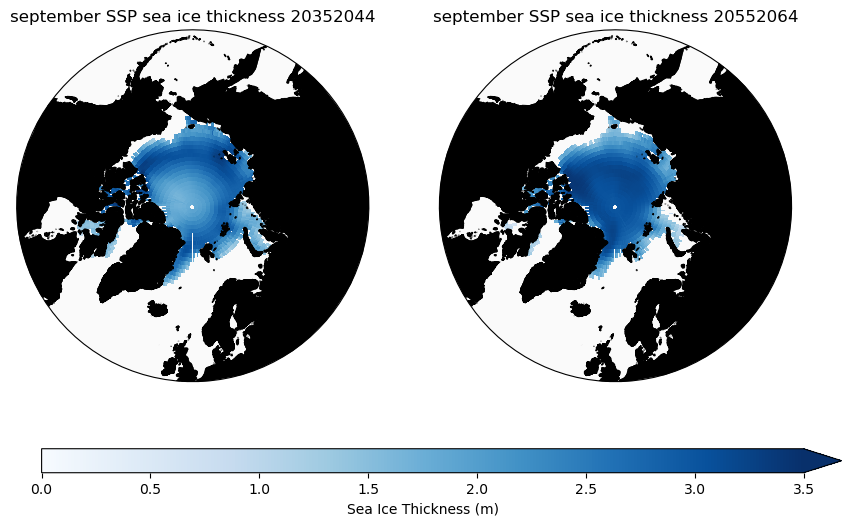

In [25]:
fig = plt.figure(figsize =(10,6))
cols = 2; rows =1 
vmins = 0
vmaxs = vmins + 3.5
newdict4 = {}
newdict4[0] = iceThicknessCONTROLsept_20352044
newdict4[1] = iceThicknessCONTROLsept_20552064
# newdict4[2] = iceThicknessCONTROLseptDiff
namedictSSPsept = {}
namedictSSPsept[0] = ('september SSP sea ice thickness 20352044')
namedictSSPsept[1] = ('september SSP sea ice thickness 20552064')
# namedictSSPsept[2] = ('sept SSP cicethic difference')
for i in range(1, cols*rows+1):
    if np.nanmin(newdict4[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues'
    if vmins < 0. and vmaxs > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, newdict4[i-1], latIce, lonIce, norm, i, mycmap, namedictSSPsept[i-1])
cbar_ax = fig.add_axes([0.15, 0.05, 0.8, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal', extend = 'max')
cbar.set_label('Sea Ice Thickness (m)', fontsize = 10)
np.max(iceThicknessCONTROLsept_20352044)

In [26]:
#DIFFERENCE MAPS SSP-ARISE TOGETHER
def subplots(ax, var, latitude, lonIce, norm, i, mycmap, namedictsept):
    var,lonIce = add_cyclic_point(var,coord=lonIce)
    ax.set_extent([180, -180, 50, 90], crs=ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_facecolor('0.98')
    
    cf1 = ax.pcolormesh(lonIce,latIce,var,transform=ccrs.PlateCarree(), 
                  norm=norm, cmap=mycmap)
    ax.coastlines(linewidth=0.8)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'black', facecolor = 'black'))
    ax.set_title(str(namedictsept))
    return cf1

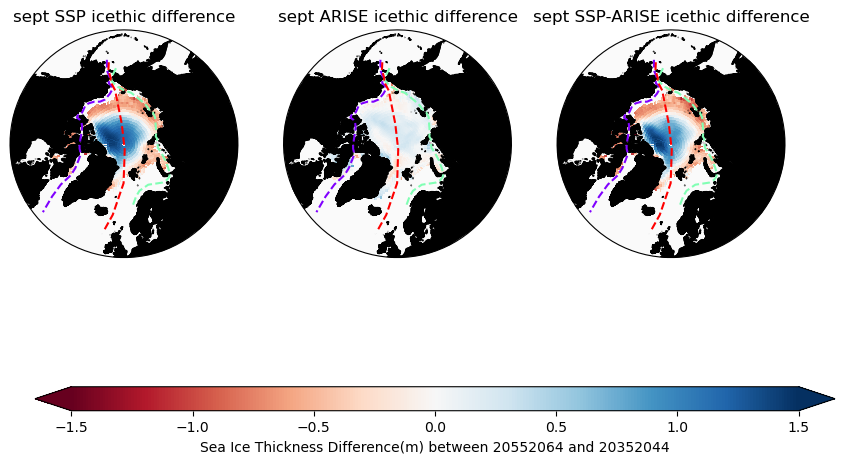

In [27]:
fig = plt.figure(figsize =(10,6))
cols = 3; rows =1 
vmins = -1.5
vmaxs = np.abs(vmins)
newdictsept = {}
newdictsept[0] = iceThicknessCONTROLseptDiff
newdictsept[1] = iceThicknessFEEDBACKseptDiff
newdictsept[2] = iceThicknessseptDiff_Control_Feedback
namedictsept = {}
namedictsept[0] = ('sept SSP icethic difference')
namedictsept[1] = ('sept ARISE icethic difference')
namedictsept[2] = ('sept SSP-ARISE icethic difference')
for i in range(1, cols*rows+1):
    if np.nanmin(newdictsept[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues'
    if vmins < 0. and vmaxs > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, newdictsept[i-1], latIce, lonIce, norm, i, mycmap, namedictsept[i-1])
    shippingRoutes.plot(ax=ax, cmap='rainbow', linestyle='--')
cbar_ax = fig.add_axes([0.15, 0.05, 0.8, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal', extend = 'both')
cbar.set_label('Sea Ice Thickness Difference(m) between 20552064 and 20352044', fontsize = 10)


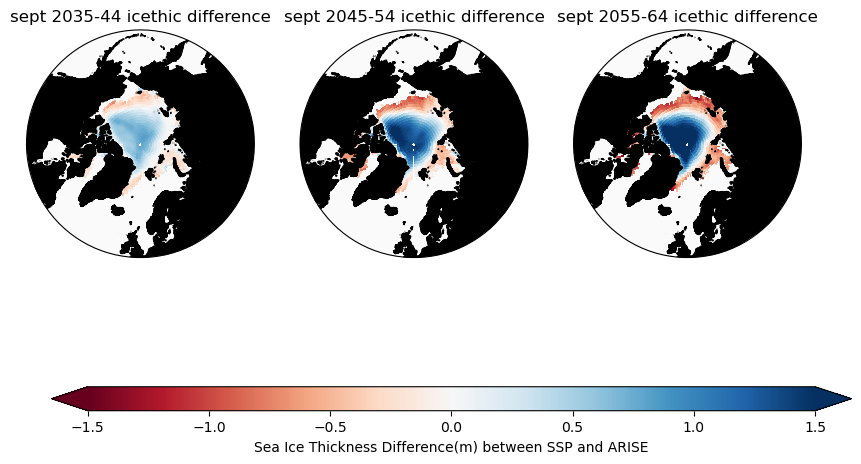

In [28]:
###plotting SSP-ARISE difference for 3 decades
fig = plt.figure(figsize =(10,6))
cols = 3; rows =1 
vmins = -1.5
vmaxs = np.abs(vmins)
newdictsept281 = {}
newdictsept281[0] = SSP_ARISEsept203544
newdictsept281[1] = SSP_ARISEsept204554
newdictsept281[2] = SSP_ARISEsept205564
namedictsept281 = {}
namedictsept281[0] = ('sept 2035-44 icethic difference')
namedictsept281[1] = ('sept 2045-54 icethic difference')
namedictsept281[2] = ('sept 2055-64 icethic difference')
for i in range(1, cols*rows+1):
    if np.nanmin(newdictsept281[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues'
    if vmins < 0. and vmaxs > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, newdictsept281[i-1], latIce, lonIce, norm, i, mycmap, namedictsept281[i-1])
cbar_ax = fig.add_axes([0.15, 0.05, 0.8, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal', extend = 'both')
cbar.set_label('Sea Ice Thickness Difference(m) between SSP and ARISE', fontsize = 10)


### Timeseries: Annual:

In [29]:
def createlist(r1, r2):
    return list(range(r1, r2+1))
SSPtimearray = createlist(2015,2069)
ARISEtimearray = createlist(2035,2069)
print(ARISEtimearray)

[2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069]


In [30]:
# ds = xr.open_dataset(dataDir + 'landMaskForSeaIce.nc',
#                     decode_times = False)
# landmask = ds.landmask
# landmask = landmask.fillna(0)
# #print(ds)
# ###both SSP and ARISE
# latmin = 66.5 #arctic circle = 66.5, Canadian/Russian coast = 60
# latmax = 90
# lonmin = 0 #arctic circle = 0, Canadian/Russian coast = 180,0
# lonmax = 360 #arctic circle = 360, Canadian/Russian coast = 360,180
# latmin_ind = int(np.abs(latmin-latIce).argmin()) #specifying what area I want to focus on
# latmax_ind = int(np.abs(latmax-latIce).argmin())
# lonmin_ind = int(np.abs(lonmin-lonIce).argmin())
# lonmax_ind = int(np.abs(lonmax-lonIce).argmin())

# SSPicethic = SSPTSdata[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind] #ICEFRAC data for the specified area
# SSPicethic = SSPicethic.fillna(0)
# ARISEicethic = ARISETSdata[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
# ARISEicethic = ARISEicethic.fillna(0)
# landmaskTS = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#landmask data for specified area
# lonmesh,latmesh = np.meshgrid(SSPicethic.lon,SSPicethic.lat)#getting mesh of lat-long of specified area
# weights = np.cos(np.deg2rad(latmesh))#weighting each grid box, dim=2
# weights = np.where(landmaskTS==0, weights, np.nan)#where 0(ocean) - gives ocean weights, else gives nan(land)
# weights = np.ma.asanyarray(weights)

# # weights[landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]==1] = 0
# # print(weights)
# # print()
# # print(landmaskTS.values)
# masked_dataSSP = np.zeros((SSPicethic.shape[0],SSPicethic.shape[1],SSPicethic.shape[2]))#0 array
# masked_dataSSP[:] = np.nan
# masked_dataARISE = np.zeros((ARISEicethic.shape[0],ARISEicethic.shape[1],ARISEicethic.shape[2]))#need separate for SSP and ARISE because different time range
# masked_dataARISE[:] = np.nan
# weights3DSSP = np.repeat(weights[np.newaxis, :, :], SSPicethic.shape[0], axis=0)#dim 3 added=time from ICEFRAC
# weights3DARISE = np.repeat(weights[np.newaxis, :, :], ARISEicethic.shape[0], axis=0)

# for iyear in range(SSPicethic.shape[0]):
#   masked_dataSSP[iyear,:,:] = np.ma.masked_array(SSPicethic[iyear,:,:], landmaskTS==1)#all land icefrac data becomes NAN
#   averageSSP = np.ma.average(masked_dataSSP,axis=(1,2),weights=weights3DSSP)#weighted avg of sea data - overlooks NANs
# for iyear in range(ARISEicethic.shape[0]):
#   masked_dataARISE[iyear,:,:] = np.ma.masked_array(ARISEicethic[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
#   averageARISE = np.ma.average(masked_dataARISE,axis=(1,2),weights=weights3DARISE)
    
# # print(averageARISE) 
# for ensNum in range(len(ens)):
#     latmin_ind = int(np.abs(latmin-latIce).argmin()) #specifying what area I want to focus on
#     latmax_ind = int(np.abs(latmax-latIce).argmin())
#     lonmin_ind = int(np.abs(lonmin-lonIce).argmin())
#     lonmax_ind = int(np.abs(lonmax-lonIce).argmin())

#     SSPicethicplotdata = iceThicknessCONTROLGrouped[ens[ensNum]][:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind] #ICEFRAC data for the specified area
#     SSPicethicplotdata = SSPicethicplotdata.fillna(0)
#     ARISEicethicplotdata = iceThicknessFEEDBACKGrouped[ens[ensNum]][:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
#     ARISEicethicplotdata = ARISEicethicplotdata.fillna(0)
#     landmaskTS = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#landmask data for specified area
#     lonmesh,latmesh = np.meshgrid(SSPicethicplotdata.lon,SSPicethicplotdata.lat)#getting mesh of lat-long of specified area
#     weights = np.cos(np.deg2rad(latmesh))#weighting each grid box, dim=2
#     # weights[landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]==1] = 0
#     weights = np.where(landmaskTS==0, weights, np.nan)#where 0(ocean) - gives ocean weights, else gives nan(land)
#     weights = np.ma.asanyarray(weights)
#     # print(weights)
#     masked_dataSSPplotdata = np.zeros((SSPicethicplotdata.shape[0],SSPicethicplotdata.shape[1],SSPicethicplotdata.shape[2]))#0 array
#     masked_dataSSP[:] = np.nan
#     masked_dataARISEplotdata = np.zeros((ARISEicethicplotdata.shape[0],ARISEicethicplotdata.shape[1],ARISEicethicplotdata.shape[2]))#need separate for SSP and ARISE because different time range
#     masked_dataSSP[:] = np.nan
#     weights3DSSPplotdata = np.repeat(weights[np.newaxis, :, :], SSPicethicplotdata.shape[0], axis=0)#dim 3 added=time from ICEFRAC
#     weights3DARISEplotdata = np.repeat(weights[np.newaxis, :, :], ARISEicethicplotdata.shape[0], axis=0)
#     for iyear in range(SSPicethicplotdata.shape[0]):
#       masked_dataSSPplotdata[iyear,:,:] = np.ma.masked_array(SSPicethicplotdata[iyear,:,:], landmaskTS==1)#all land icefrac data becomes NAN
#       averageSSPplotdata = np.ma.average(masked_dataSSPplotdata,axis=(1,2),weights=weights3DSSPplotdata)#weighted avg of sea data - overlooks NANs
#     for iyear in range(ARISEicethicplotdata.shape[0]):
#       masked_dataARISEplotdata[iyear,:,:] = np.ma.masked_array(ARISEicethicplotdata[iyear,:,:],landmaskTS==1)#all land icefrac data becomes NAN
#       averageARISEplotdata = np.ma.average(masked_dataARISEplotdata,axis=(1,2),weights=weights3DARISEplotdata)
#     plt.xlim(2015,2070)
#     plt.plot(SSPtimearray, averageSSPplotdata, color = 'salmon', linestyle=':')
#     plt.plot(ARISEtimearray, averageARISEplotdata, color = 'lightskyblue', linestyle=':')
#     plt.axvline(x=2035, linestyle = ':', color = 'black')
 
# ##FINDING % CHANGE:
# print('SSP ICETHIC IN 2035=',averageSSP[20])#avg icefrac at 2035 when we initiate SAI
# print('SSP ICETHIC IN 2069=',averageSSP[54])#in 2069
# percentSSPchange = (averageSSP[54] - averageSSP[20])*100/averageSSP[20]
# print('CHANGE IN SSP ICETHIC=', percentSSPchange, str('%'))
# print('ARISE ICETHIC IN 2035=',averageARISE[0])#avg icefrac at 2035 when we initiate SAI
# print('ARISE ICETHIC IN 2069=',averageARISE[34])#in 2069
# percentARISEchange = (averageARISE[34] - averageARISE[0])*100/averageARISE[0]
# print('CHANGE IN ARISE ICETHIC=', percentARISEchange, str('%'))

# # #graph design
# # plt.ylim(0.15,0.95)
# plt.xlim(2015,2070)
# plt.xlabel('Year')
# plt.ylabel('Sea Ice Thickness(m)')
# plt.title('Annual ICETHIC: above Arctic Circle')
# plt.plot(SSPtimearray, averageSSP, color = 'red', label = "SSP")
# plt.plot(ARISEtimearray, averageARISE, color = 'blue', label = "ARISE")
# plt.axvline(x=2035, linestyle = ':', color = 'black')
# plt.axhline(y=averageSSP[20], linestyle = ':', color = 'black')
# plt.legend()
# # plt.text(2040, 0.45, 'SSP CHANGE = -13.117%', fontsize = 12)
# # plt.text(2040, 0.4, 'ARISE CHANGE = -1.718%', fontsize = 12)

### September

In [31]:
# latmin2 = 66.5
# latmax2 = 90
# lonmin2 = 0
# lonmax2 = 360
# latmin_ind = int(np.abs(latmin2-latIce).argmin()) #specifying what area I want to focus on
# latmax_ind = int(np.abs(latmax2-latIce).argmin())
# lonmin_ind = int(np.abs(lonmin2-lonIce).argmin())
# lonmax_ind = int(np.abs(lonmax2-lonIce).argmin())

# SSPicethicSeptTS = TS_sspSept[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind] #ICEFRAC data for the specified area
# SSPicethicSeptTS = SSPicethicSeptTS.fillna(0)
# ARISEicethicSeptTS = TS_ariseSept[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
# ARISEicethicSeptTS = ARISEicethicSeptTS.fillna(0)
# landmaskTS = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#landmask data for specified area
# lonmesh,latmesh = np.meshgrid(SSPicethicSeptTS.lon,SSPicethicSeptTS.lat)#getting mesh of lat-long of specified area
# weights = np.cos(np.deg2rad(latmesh))#weighting each grid box, dim=2

# masked_dataSSPsept = np.zeros((SSPicethicSeptTS.shape[0],SSPicethicSeptTS.shape[1],SSPicethicSeptTS.shape[2]))#0 array
# masked_dataARISEsept = np.zeros((ARISEicethicSeptTS.shape[0],ARISEicethicSeptTS.shape[1],ARISEicethicSeptTS.shape[2]))#need separate for SSP and ARISE because different time range
# weights3DSSPsept = np.repeat(weights[np.newaxis, :, :], SSPicethicSeptTS.shape[0], axis=0)#dim 3 added=time from ICEFRAC
# weights3DARISEsept = np.repeat(weights[np.newaxis, :, :], ARISEicethicSeptTS.shape[0], axis=0)
# for iyear in range(SSPicethicSeptTS.shape[0]):
#   masked_dataSSPsept[iyear,:,:] = np.ma.masked_array(SSPicethicSeptTS[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
#   averageSSPsept = np.ma.average(masked_dataSSPsept,axis=(1,2),weights=weights3DSSPsept)#weighted avg of sea data - overlooks NANs
# for iyear in range(ARISEicethicSeptTS.shape[0]):
#   masked_dataARISEsept[iyear,:,:] = np.ma.masked_array(ARISEicethicSeptTS[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
#   averageARISEsept = np.ma.average(masked_dataARISEsept,axis=(1,2),weights=weights3DARISEsept)
# # print(masked_dataSSPsept[iyear,:,:])

# #FINDING % CHANGE:
# print('SSP ICEthic IN 2035=',averageSSPsept[20])#avg icefrac at 2035 when we initiate SAI
# print('SSP ICEthic IN 2069=',averageSSPsept[54])#in 2069
# percentSSPseptchange = (averageSSPsept[54] - averageSSPsept[20])*100/averageSSPsept[20]
# print('CHANGE IN SSP ICEthic=', percentSSPseptchange, str('%'))
# print('ARISE ICEthic IN 2035=',averageARISEsept[0])#avg icefrac at 2035 when we initiate SAI
# print('ARISE ICEthic IN 2069=',averageARISEsept[34])#in 2069
# percentARISEseptchange = (averageARISEsept[34] - averageARISEsept[0])*100/averageARISEsept[0]
# print('CHANGE IN ARISE ICEthic=', percentARISEseptchange, str('%'))

# for ensNum in range(len(ens)):
#     latmin_ind = int(np.abs(latmin2-latIce).argmin()) #specifying what area I want to focus on
#     latmax_ind = int(np.abs(latmax2-latIce).argmin())
#     lonmin_ind = int(np.abs(lonmin2-lonIce).argmin())
#     lonmax_ind = int(np.abs(lonmax2-lonIce).argmin())

#     SSPicethicSeptTSens = iceThicknessCONTROL[ens[ensNum]].sel(time=iceThicknessCONTROL[ens[ensNum]][:,:,:].time.dt.month.isin([9]))[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind] #ICEFRAC data for the specified area
#     SSPicethicSeptTSens = SSPicethicSeptTSens.fillna(0)
#     ARISEicethicSeptTSens = iceThicknessFEEDBACK[ens[ensNum]].sel(time=iceThicknessFEEDBACK[ens[ensNum]][:,:,:].time.dt.month.isin([9]))[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
#     ARISEicethicSeptTSens = ARISEicethicSeptTSens.fillna(0)
#     landmaskTSens = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#landmask data for specified area
#     lonmesh,latmesh = np.meshgrid(SSPicethicSeptTS.lon,SSPicethicSeptTS.lat)#getting mesh of lat-long of specified area
#     weights = np.cos(np.deg2rad(latmesh))#weighting each grid box, dim=2

#     masked_dataSSPseptens = np.zeros((SSPicethicSeptTSens.shape[0],SSPicethicSeptTSens.shape[1],SSPicethicSeptTSens.shape[2]))#0 array
#     masked_dataARISEseptens = np.zeros((ARISEicethicSeptTSens.shape[0],ARISEicethicSeptTSens.shape[1],ARISEicethicSeptTSens.shape[2]))#need separate for SSP and ARISE because different time range
#     weights3DSSPseptens = np.repeat(weights[np.newaxis, :, :], SSPicethicSeptTSens.shape[0], axis=0)#dim 3 added=time from ICEFRAC
#     weights3DARISEseptens = np.repeat(weights[np.newaxis, :, :], ARISEicethicSeptTSens.shape[0], axis=0)
#     for iyear in range(SSPicethicSeptTSens.shape[0]):
#       masked_dataSSPseptens[iyear,:,:] = np.ma.masked_array(SSPicethicSeptTSens[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
#       averageSSPseptens = np.ma.average(masked_dataSSPseptens,axis=(1,2),weights=weights3DSSPseptens)#weighted avg of sea data - overlooks NANs
#     for iyear in range(ARISEicethicSeptTSens.shape[0]):
#       masked_dataARISEseptens[iyear,:,:] = np.ma.masked_array(ARISEicethicSeptTSens[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
#       averageARISEseptens = np.ma.average(masked_dataARISEseptens,axis=(1,2),weights=weights3DARISEseptens)
#     # print(masked_dataSSPsept[iyear,:,:])
#     plt.plot(SSPtimearray, averageSSPseptens, color = 'salmon', linestyle = ':')
#     plt.plot(ARISEtimearray, averageARISEseptens, color = 'lightskyblue', linestyle = ':')
# #graph design
# # plt.ylim(0.38, 0.86)
# plt.xlim(2015,2070)
# plt.xlabel('Year')
# plt.ylabel('Sea Ice Thickness(m)')
# plt.title('September ICETHIC: Russian coast: >60lat, 0-180lon')
# plt.plot(SSPtimearray, averageSSPsept, color = 'red', label = "SSP")
# plt.plot(ARISEtimearray, averageARISEsept, color = 'blue', label = "ARISE")
# plt.axvline(x=2035, linestyle = ':', color = 'black')
# plt.axhline(y=averageSSPsept[20], linestyle = ':', color = 'black')
# plt.legend(loc='upper right')
# plt.text(2040, 0.7, 'SSP CHANGE = -20.756%', fontsize = 12)
# plt.text(2040, 0.67, 'ARISE CHANGE = 1.132%', fontsize = 12)


In [32]:
# # iceThicknessCONTROL[ens[ensNum]].sel(time=iceThicknessCONTROL[ens[ensNum]][:,:,:].time.dt.month.isin([9]))
# print(landmaskTS)
# print()
# print(masked_dataSSPseptens[1,:,:])
# print()
# print(weights3DSSPseptens[1,:,:])


In [33]:
# ds = xr.open_dataset(dataDir + 'landMaskForSeaIce.nc',
#                     decode_times = False)
# landmask = ds.landmask
# print(landmask.values)

### July-October

In [34]:
# latmin3 = 66.5
# latmax3 = 90
# lonmin3 = 0
# lonmax3 = 360
# latmin_ind = int(np.abs(latmin3-latIce).argmin()) #specifying what area I want to focus on
# latmax_ind = int(np.abs(latmax3-latIce).argmin())
# lonmin_ind = int(np.abs(lonmin3-lonIce).argmin())
# lonmax_ind = int(np.abs(lonmax3-lonIce).argmin())

# SSPicethicJASO = JASOmeanSSP[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind] #ICEFRAC data for the specified area
# SSPicethicJASO = SSPicethicJASO.fillna(0)
# ARISEicethicJASO = JASOmeanARISE[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
# ARISEicethicJASO = ARISEicethicJASO.fillna(0)
# landmaskTS = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#landmask data for specified area
# lonmesh,latmesh = np.meshgrid(SSPicethicJASO.lon,SSPicethicJASO.lat)#getting mesh of lat-long of specified area
# weights = np.cos(np.deg2rad(latmesh))#weighting each grid box, dim=2

# masked_dataSSPJASO = np.zeros((SSPicethicJASO.shape[0],SSPicethicJASO.shape[1],SSPicethicJASO.shape[2]))#0 array
# masked_dataARISEJASO = np.zeros((ARISEicethicJASO.shape[0],ARISEicethicJASO.shape[1],ARISEicethicJASO.shape[2]))#need separate for SSP and ARISE because different time range
# weights3DSSPJASO = np.repeat(weights[np.newaxis, :, :], SSPicethicJASO.shape[0], axis=0)#dim 3 added=time from ICEFRAC
# weights3DARISEJASO = np.repeat(weights[np.newaxis, :, :], ARISEicethicJASO.shape[0], axis=0)
# for iyear in range(SSPicethicJASO.shape[0]):
#   masked_dataSSPJASO[iyear,:,:] = np.ma.masked_array(SSPicethicJASO[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
#   averageSSPJASO = np.ma.average(masked_dataSSPJASO,axis=(1,2),weights=weights3DSSPJASO)#weighted avg of sea data - overlooks NANs
# for iyear in range(ARISEicethicJASO.shape[0]):
#   masked_dataARISEJASO[iyear,:,:] = np.ma.masked_array(ARISEicethicJASO[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
#   averageARISEJASO = np.ma.average(masked_dataARISEJASO,axis=(1,2),weights=weights3DARISEJASO)
# # print(masked_dataSSPJASO[iyear,:,:])

# #FINDING % CHANGE:
# print('SSP ICEthic IN 2035=',averageSSPJASO[20])#avg icefrac at 2035 when we initiate SAI
# print('SSP ICEthic IN 2069=',averageSSPJASO[54])#in 2069
# percentSSPJASOchange = (averageSSPJASO[54] - averageSSPJASO[20])*100/averageSSPJASO[20]
# print('CHANGE IN SSP ICEthic=', percentSSPJASOchange, str('%'))
# print('ARISE ICEthic IN 2035=',averageARISEJASO[0])#avg icefrac at 2035 when we initiate SAI
# print('ARISE ICEthic IN 2069=',averageARISEJASO[34])#in 2069
# percentARISEJASOchange = (averageARISEJASO[34] - averageARISEJASO[0])*100/averageARISEJASO[0]
# print('CHANGE IN ARISE ICEthic=', percentARISEJASOchange, str('%'))

# for ensNum in range(len(ens)):

#     latmin_ind = int(np.abs(latmin3-latIce).argmin()) #specifying what area I want to focus on
#     latmax_ind = int(np.abs(latmax3-latIce).argmin())
#     lonmin_ind = int(np.abs(lonmin3-lonIce).argmin())
#     lonmax_ind = int(np.abs(lonmax3-lonIce).argmin())
#     a = iceThicknessCONTROL[ens[ensNum]].sel(time=iceThicknessCONTROL[ens[ensNum]][:,:,:].time.dt.month.isin([7,8,9,10]))
#     b = a.groupby('time.year').mean(dim='time', skipna = True)
#     c = iceThicknessFEEDBACK[ens[ensNum]].sel(time=iceThicknessFEEDBACK[ens[ensNum]][:,:,:].time.dt.month.isin([7,8,9,10]))
#     d = c.groupby('time.year').mean(dim='time', skipna = True)
#     SSPicethicJASOens = b[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind] #ICEFRAC data for the specified area
#     SSPicethicJASOens = SSPicethicJASOens.fillna(0)
#     ARISEicethicJASOens = d[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
#     ARISEicethicJASOens = ARISEicethicJASOens.fillna(0)
#     landmaskTS = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#landmask data for specified area
#     lonmesh,latmesh = np.meshgrid(SSPicethicJASOens.lon,SSPicethicJASOens.lat)#getting mesh of lat-long of specified area
#     weights = np.cos(np.deg2rad(latmesh))#weighting each grid box, dim=2

#     masked_dataSSPJASOens = np.zeros((SSPicethicJASOens.shape[0],SSPicethicJASOens.shape[1],SSPicethicJASOens.shape[2]))#0 array
#     masked_dataARISEJASOens = np.zeros((ARISEicethicJASOens.shape[0],ARISEicethicJASOens.shape[1],ARISEicethicJASOens.shape[2]))#need separate for SSP and ARISE because different time range
#     weights3DSSPJASOens = np.repeat(weights[np.newaxis, :, :], SSPicethicJASOens.shape[0], axis=0)#dim 3 added=time from ICEFRAC
#     weights3DARISEJASOens = np.repeat(weights[np.newaxis, :, :], ARISEicethicJASOens.shape[0], axis=0)
#     for iyear in range(SSPicethicJASOens.shape[0]):
#       masked_dataSSPJASOens[iyear,:,:] = np.ma.masked_array(SSPicethicJASOens[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
#       averageSSPJASOens = np.ma.average(masked_dataSSPJASOens,axis=(1,2),weights=weights3DSSPJASOens)#weighted avg of sea data - overlooks NANs
#     for iyear in range(ARISEicethicJASOens.shape[0]):
#       masked_dataARISEJASOens[iyear,:,:] = np.ma.masked_array(ARISEicethicJASOens[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
#       averageARISEJASOens = np.ma.average(masked_dataARISEJASOens,axis=(1,2),weights=weights3DARISEJASOens)
#     plt.plot(SSPtimearray, averageSSPJASOens, color = 'salmon', linestyle = ':')
#     plt.plot(ARISEtimearray, averageARISEJASOens, color = 'lightskyblue', linestyle = ':')
# #graph design
# plt.ylim(0.275,1)
# plt.xlim(2015,2070)
# plt.xlabel('Year')
# plt.ylabel('Sea Ice Thickness(m)')
# plt.title('JULY-OCTOBER ICETHIC: above Arctic Circle')
# plt.plot(SSPtimearray, averageSSPJASO, color = 'red', label = "SSP")
# plt.plot(ARISEtimearray, averageARISEJASO, color = 'blue', label = "ARISE")
# plt.axvline(x=2035, linestyle = ':', color = 'black')
# plt.axhline(y=averageSSPJASO[20], linestyle = ':', color = 'black')
# plt.legend()
# plt.text(2040, 0.8, 'SSP CHANGE = 3.58%', fontsize = 12)
# plt.text(2040, 0.75, 'ARISE CHANGE = -1.921%', fontsize = 12)


### NEW timeseries: annual:

SSP ICETHIC IN 2035= 1.3216438405648763
SSP ICETHIC IN 2069= 1.2100962923921441
CHANGE IN SSP ICETHIC= -8.440061138185023 %
ARISE ICETHIC IN 2035= 1.336243906306904
ARISE ICETHIC IN 2069= 1.3866676175530028
CHANGE IN ARISE ICETHIC= 3.7735409686888137 %


Text(2040, 1.65, 'ARISE CHANGE = 3.773%')

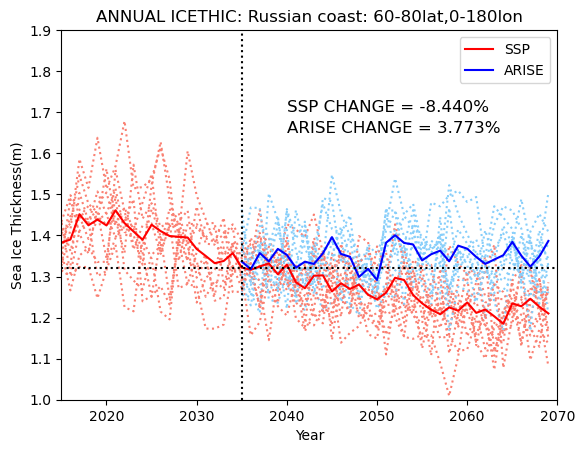

In [35]:
ds = xr.open_dataset(dataDir + 'landMaskForSeaIce.nc',
                    decode_times = False)
landmask = ds.landmask
landmask = landmask.fillna(0) #0-ocean,1-land
latmin = 60
latmax = 80
lonmin = 0 
lonmax = 180 
latmin_ind = int(np.abs(latmin-latIce).argmin()) #specifying what area I want to focus on
latmax_ind = int(np.abs(latmax-latIce).argmin())
lonmin_ind = int(np.abs(lonmin-lonIce).argmin())
lonmax_ind = int(np.abs(lonmax-lonIce).argmin())
SSPicethic = SSPTSdata[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping data to specified area
ARISEicethic = ARISETSdata[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
landmaskTS = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping landmask to specified area
lonmesh,latmesh = np.meshgrid(SSPicethic.lon,SSPicethic.lat)
weights3Dssp = np.zeros((len(SSPicethic.year),len(SSPicethic.lat),len(SSPicethic.lon)))
weights3Darise = np.zeros((len(ARISEicethic.year),len(ARISEicethic.lat),len(ARISEicethic.lon)))
# print(len(SSPicethic.lat))
for iyear in range(len(SSPicethic.year)):
    SSPicethic[iyear,:,:] = np.ma.MaskedArray(SSPicethic[iyear,:,:], mask=(landmaskTS==1))
    # print(SSPicethic[iyear,:,:].shape)
    weights3Dssp[iyear,:,:] = np.cos(np.deg2rad(latmesh))
    # print(len(weights3Dssp[0,:,20:25]))
    weights3Dssp[iyear,:,:][landmaskTS==1] = np.nan
for iyear in range(len(ARISEicethic.year)):
    ARISEicethic[iyear,:,:] = np.ma.MaskedArray(ARISEicethic[iyear,:,:], mask=(landmaskTS==1))
    weights3Darise[iyear,:,:] = np.cos(np.deg2rad(latmesh))
    weights3Darise[iyear,:,:][landmaskTS==1] = np.nan
# print("weights:", weights3Dssp[0,:,20:25])
# print("landmask: ", landmask[:,20:25])
# print("data: ", SSPicethic[0,:,20:25])
# Annual time series 
SSPicethic_masked = np.ma.MaskedArray(SSPicethic, mask=np.isnan(SSPicethic))
weightsSSP             = np.ma.asanyarray(weights3Dssp)
SSPicethic_TS     = np.array([np.ma.average(
                                    SSPicethic_masked[i],
                                    weights=weightsSSP[i]
                                    ) for i in range((SSPicethic_masked.shape)[0])])
ARISEicethic_masked = np.ma.MaskedArray(ARISEicethic, mask=np.isnan(ARISEicethic))
weightsARISE          = np.ma.asanyarray(weights3Darise)
ARISEicethic_TS     = np.array([np.ma.average(
                                    ARISEicethic_masked[i],
                                    weights=weightsARISE[i]
                                    ) for i in range((ARISEicethic_masked.shape)[0])])
for ensNum in range(len(ens)):
    latmin_ind = int(np.abs(latmin-latIce).argmin()) #specifying what area I want to focus on
    latmax_ind = int(np.abs(latmax-latIce).argmin())
    lonmin_ind = int(np.abs(lonmin-lonIce).argmin())
    lonmax_ind = int(np.abs(lonmax-lonIce).argmin())
    SSPicethicens = iceThicknessCONTROLGrouped[ens[ensNum]][:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping data to specified area
    ARISEicethicens = iceThicknessFEEDBACKGrouped[ens[ensNum]][:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
    landmaskTSens = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping landmask to specified area
    lonmesh,latmesh = np.meshgrid(SSPicethicens.lon,SSPicethicens.lat)
    weights3Dsspens = np.zeros((len(SSPicethicens.year),len(SSPicethicens.lat),len(SSPicethicens.lon)))
    weights3Dariseens = np.zeros((len(ARISEicethicens.year),len(ARISEicethicens.lat),len(ARISEicethicens.lon)))
    # print(len(SSPicethic.lat))
    for iyear in range(len(SSPicethicens.year)):
        SSPicethicens[iyear,:,:] = np.ma.MaskedArray(SSPicethicens[iyear,:,:], mask=(landmaskTSens==1))
        # print(SSPicethic[iyear,:,:].shape)
        weights3Dsspens[iyear,:,:] = np.cos(np.deg2rad(latmesh))
        # print(len(weights3Dssp[0,:,20:25]))
        weights3Dsspens[iyear,:,:][landmaskTSens==1] = np.nan
    for iyear in range(len(ARISEicethicens.year)):
        ARISEicethicens[iyear,:,:] = np.ma.MaskedArray(ARISEicethicens[iyear,:,:], mask=(landmaskTSens==1))
        weights3Dariseens[iyear,:,:] = np.cos(np.deg2rad(latmesh))
        weights3Dariseens[iyear,:,:][landmaskTSens==1] = np.nan
    # print("weights:", weights3Dssp[0,:,20:25])
    # print("landmask: ", landmask[:,20:25])
    # print("data: ", SSPicethic[0,:,20:25])
    # Annual time series 
    SSPicethicens_masked = np.ma.MaskedArray(SSPicethicens, mask=np.isnan(SSPicethicens))
    weightsSSPens             = np.ma.asanyarray(weights3Dsspens)
    SSPicethicens_TS     = np.array([np.ma.average(
                                        SSPicethicens_masked[i],
                                        weights=weightsSSPens[i]
                                        ) for i in range((SSPicethicens_masked.shape)[0])])
    ARISEicethicens_masked = np.ma.MaskedArray(ARISEicethicens, mask=np.isnan(ARISEicethicens))
    weightsARISEens          = np.ma.asanyarray(weights3Dariseens)
    ARISEicethicens_TS     = np.array([np.ma.average(
                                        ARISEicethicens_masked[i],
                                        weights=weightsARISEens[i]
                                        ) for i in range((ARISEicethicens_masked.shape)[0])])
    plt.plot(SSPtimearray, SSPicethicens_TS , color = 'salmon', linestyle=':')
    plt.plot(ARISEtimearray, ARISEicethicens_TS, color = 'lightskyblue', linestyle=':')

##FINDING % CHANGE:
print('SSP ICETHIC IN 2035=',SSPicethic_TS[20])#avg icefrac at 2035 when we initiate SAI
print('SSP ICETHIC IN 2069=',SSPicethic_TS[54])#in 2069
percentSSPchange = (SSPicethic_TS[54] - SSPicethic_TS[20])*100/SSPicethic_TS[20]
print('CHANGE IN SSP ICETHIC=', percentSSPchange, str('%'))
print('ARISE ICETHIC IN 2035=',ARISEicethic_TS[0])#avg icefrac at 2035 when we initiate SAI
print('ARISE ICETHIC IN 2069=',ARISEicethic_TS[34])#in 2069
percentARISEchange = (ARISEicethic_TS[34] - ARISEicethic_TS[0])*100/ARISEicethic_TS[0]
print('CHANGE IN ARISE ICETHIC=', percentARISEchange, str('%'))

plt.plot(SSPtimearray, SSPicethic_TS , color = 'red', label='SSP')
plt.plot(ARISEtimearray, ARISEicethic_TS, color = 'blue', label='ARISE')
plt.xlim(2015,2070)
plt.ylim(1,1.9)
plt.xlabel('Year')
plt.ylabel('Sea Ice Thickness(m)')
plt.title('ANNUAL ICETHIC: Russian coast: 60-80lat,0-180lon')
plt.axvline(x=2035, linestyle = ':', color = 'black')
plt.axhline(y=SSPicethic_TS[20], linestyle = ':', color = 'black')
plt.legend()
plt.text(2040, 1.7, 'SSP CHANGE = -8.440%', fontsize = 12)
plt.text(2040, 1.65, 'ARISE CHANGE = 3.773%', fontsize = 12)

In [40]:
# print(weights3Dssp[0,:,20:25])
# print(len(SSPicethic[2]))
SSPicethicSeptTS.shape[0]
len(range(SSPicethicSeptTS.shape[0]))

55

### SEPTEMBER

In [39]:
SSPicethicSeptTSens

<xarray.DataArray 'sithick' (time: 55, lat: 24, lon: 287)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan, 1.178086, ..., 1.195472, 1.186644],
        [     nan,      nan, ..., 1.262499, 1.205989]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan, 1.078394, ..., 1.080967, 1.075971],
        [     nan,      nan, ..., 1.09428 , 1.072583]],

       ...,

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan, 2.924716, ..., 2.947423, 2.943015],
        [     nan,      nan, ..., 2.947329, 2.93956 ]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan, 2.350317, ..., 2.452732, 2.422268],
        [     nan,      nan, ..., 2.584069, 2.556573]]])
Coordinates:
  * lat      (lat) float64 66.44 67.38 68.32 69.27 ... 85.29 86.23 87.17 88.12
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 353.8 355.0 356.2 357.5
  * time     (time) datetime64[ns] 2015-09-01 2016-09-01 ... 2069-09-01
Attributes:
    units:          m
    long_name:      sea ice thickness
    cell_measures:  area: tarea
    cell_methods:   time: mean
    time_rep:       averaged
    inFile:         b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.010.cice...
    outPath:        /glade/scratch/arielm/ArcticShippingSAI/regriddedLatLon/

SSP ICETHIC IN 2035= 2.430584062816225
SSP ICETHIC IN 2069= 2.855956071588759
CHANGE IN SSP ICETHIC= 17.500814527668357 %
ARISE ICETHIC IN 2035= 2.310619575738357
ARISE ICETHIC IN 2069= 2.4511108555940457
CHANGE IN ARISE ICETHIC= 6.080242776909516 %


Text(2040, 1.75, 'ARISE CHANGE = -1.921%')

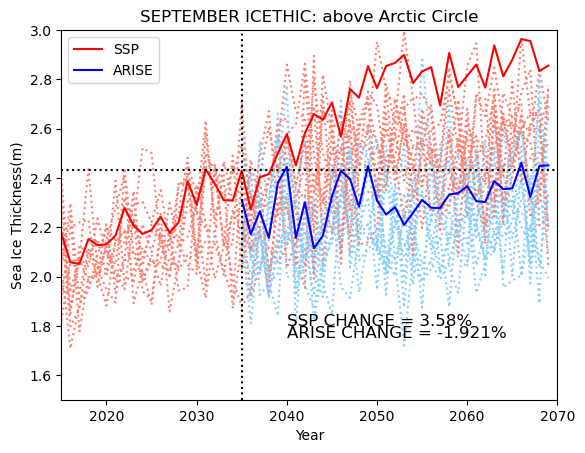

In [38]:

latmin2 = 66.5
latmax2 = 90
lonmin2 = 0
lonmax2 = 360 
latmin_ind = int(np.abs(latmin2-latIce).argmin()) #specifying what area I want to focus on
latmax_ind = int(np.abs(latmax2-latIce).argmin())
lonmin_ind = int(np.abs(lonmin2-lonIce).argmin())
lonmax_ind = int(np.abs(lonmax2-lonIce).argmin())
SSPicethicSeptTS = TS_sspSept[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping data to specified area
ARISEicethicSeptTS = TS_ariseSept[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
landmaskTSSeptTS = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping landmask to specified area
lonmesh,latmesh = np.meshgrid(SSPicethicSeptTS.lon,SSPicethicSeptTS.lat)
weights3DsspSeptTS = np.zeros((SSPicethicSeptTS.shape[0],len(SSPicethicSeptTS.lat),len(SSPicethicSeptTS.lon)))
weights3DariseSeptTS = np.zeros((ARISEicethicSeptTS.shape[0],len(ARISEicethicSeptTS.lat),len(ARISEicethicSeptTS.lon)))
# print(len(SSPicethic.lat))
for iyear in range(SSPicethicSeptTS.shape[0]):
    SSPicethicSeptTS[iyear,:,:] = np.ma.MaskedArray(SSPicethicSeptTS[iyear,:,:], mask=(landmaskTSSeptTS==1))
    # print(SSPicethic[iyear,:,:].shape)
    weights3DsspSeptTS[iyear,:,:] = np.cos(np.deg2rad(latmesh))
    # print(len(weights3Dssp[0,:,20:25]))
    weights3DsspSeptTS[iyear,:,:][landmaskTSSeptTS==1] = np.nan
for iyear in range(ARISEicethicSeptTS.shape[0]):
    ARISEicethicSeptTS[iyear,:,:] = np.ma.MaskedArray(ARISEicethicSeptTS[iyear,:,:], mask=(landmaskTSSeptTS==1))
    weights3DariseSeptTS[iyear,:,:] = np.cos(np.deg2rad(latmesh))
    weights3DariseSeptTS[iyear,:,:][landmaskTSSeptTS==1] = np.nan
# print("weights:", weights3DsspSeptTS[0,:,20:25])
# print("landmask: ", landmaskTSSeptTS[:,20:25])
# print("data: ", SSPicethicSeptTS[0,:,20:25])
# Annual time series 
SSPicethicSept_masked = np.ma.MaskedArray(SSPicethicSeptTS, mask=np.isnan(SSPicethicSeptTS))
weightsSSPSept             = np.ma.asanyarray(weights3DsspSeptTS)
SSPicethicSept_TS     = np.array([np.ma.average(
                                    SSPicethicSept_masked[i],
                                    weights=weightsSSPSept[i]
                                    ) for i in range((SSPicethicSept_masked.shape)[0])])
ARISEicethicSept_masked = np.ma.MaskedArray(ARISEicethicSeptTS, mask=np.isnan(ARISEicethicSeptTS))
weightsARISESept          = np.ma.asanyarray(weights3DariseSeptTS)
ARISEicethicSept_TS     = np.array([np.ma.average(
                                    ARISEicethicSept_masked[i],
                                    weights=weightsARISESept[i]
                                    ) for i in range((ARISEicethicSept_masked.shape)[0])])
##FINDING % CHANGE:
print('SSP ICETHIC IN 2035=',SSPicethicSept_TS[20])#avg icefrac at 2035 when we initiate SAI
print('SSP ICETHIC IN 2069=',SSPicethicSept_TS[54])#in 2069
percentSSPchange = (SSPicethicSept_TS[54] - SSPicethicSept_TS[20])*100/SSPicethicSept_TS[20]
print('CHANGE IN SSP ICETHIC=', percentSSPchange, str('%'))
print('ARISE ICETHIC IN 2035=',ARISEicethicSept_TS[0])#avg icefrac at 2035 when we initiate SAI
print('ARISE ICETHIC IN 2069=',ARISEicethicSept_TS[34])#in 2069
percentARISEchange = (ARISEicethicSept_TS[34] - ARISEicethicSept_TS[0])*100/ARISEicethicSept_TS[0]
print('CHANGE IN ARISE ICETHIC=', percentARISEchange, str('%'))

for ensNum in range(len(ens)):
    latmin_ind = int(np.abs(latmin2-latIce).argmin()) #specifying what area I want to focus on
    latmax_ind = int(np.abs(latmax2-latIce).argmin())
    lonmin_ind = int(np.abs(lonmin2-lonIce).argmin())
    lonmax_ind = int(np.abs(lonmax2-lonIce).argmin())
    SSPicethicSeptTSens = iceThicknessCONTROL[ens[ensNum]].sel(time=iceThicknessCONTROL[ens[ensNum]][:,:,:].time.dt.month.isin([9]))[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping data to specified area
    ARISEicethicSeptTSens = iceThicknessFEEDBACK[ens[ensNum]].sel(time=iceThicknessFEEDBACK[ens[ensNum]][:,:,:].time.dt.month.isin([9]))[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
    landmaskTSSeptTSens = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping landmask to specified area
    lonmesh,latmesh = np.meshgrid(SSPicethicSeptTSens.lon,SSPicethicSeptTSens.lat)
    weights3DsspSeptTSens = np.zeros((SSPicethicSeptTSens.shape[0],len(SSPicethicSeptTSens.lat),len(SSPicethicSeptTSens.lon)))
    weights3DariseSeptTSens = np.zeros((ARISEicethicSeptTSens.shape[0],len(ARISEicethicSeptTSens.lat),len(ARISEicethicSeptTSens.lon)))
    # print(len(SSPicethic.lat))
    for iyear in range(SSPicethicSeptTSens.shape[0]):
        SSPicethicSeptTSens[iyear,:,:] = np.ma.MaskedArray(SSPicethicSeptTSens[iyear,:,:], mask=(landmaskTSSeptTSens==1))
        # print(SSPicethic[iyear,:,:].shape)
        weights3DsspSeptTSens[iyear,:,:] = np.cos(np.deg2rad(latmesh))
        # print(len(weights3Dssp[0,:,20:25]))
        weights3DsspSeptTSens[iyear,:,:][landmaskTSSeptTSens==1] = np.nan
    for iyear in range(ARISEicethicSeptTSens.shape[0]):
        ARISEicethicSeptTSens[iyear,:,:] = np.ma.MaskedArray(ARISEicethicSeptTSens[iyear,:,:], mask=(landmaskTSSeptTSens==1))
        weights3DariseSeptTSens[iyear,:,:] = np.cos(np.deg2rad(latmesh))
        weights3DariseSeptTSens[iyear,:,:][landmaskTSSeptTSens==1] = np.nan
    # print("weights:", weights3DsspSeptTSens[0,:,20:25])
    # print("landmask: ", landmaskTSSeptTS[:,20:25])
    # print("data: ", SSPicethicSeptTSens[0,:,20:25])
   
    SSPicethicSeptens_masked = np.ma.MaskedArray(SSPicethicSeptTSens, mask=np.isnan(SSPicethicSeptTSens))
    weightsSSPSeptens             = np.ma.asanyarray(weights3DsspSeptTSens)
    SSPicethicSeptens_TS     = np.array([np.ma.average(
                                        SSPicethicSeptens_masked[i],
                                        weights=weightsSSPSeptens[i]
                                        ) for i in range((SSPicethicSeptens_masked.shape)[0])])
    ARISEicethicSeptens_masked = np.ma.MaskedArray(ARISEicethicSeptTSens, mask=np.isnan(ARISEicethicSeptTSens))
    weightsARISESeptens          = np.ma.asanyarray(weights3DariseSeptTSens)
    ARISEicethicSeptens_TS     = np.array([np.ma.average(
                                        ARISEicethicSeptens_masked[i],
                                        weights=weightsARISESeptens[i]
                                        ) for i in range((ARISEicethicSeptens_masked.shape)[0])])
    plt.plot(SSPtimearray, SSPicethicSeptens_TS , color = 'salmon', linestyle=':')
    plt.plot(ARISEtimearray, ARISEicethicSeptens_TS, color = 'lightskyblue', linestyle=':')
    
    
plt.plot(SSPtimearray, SSPicethicSept_TS , color = 'red', label='SSP')
plt.plot(ARISEtimearray, ARISEicethicSept_TS, color = 'blue', label='ARISE')
plt.xlim(2015,2070)
plt.ylim(1.5,3)
plt.xlabel('Year')
plt.ylabel('Sea Ice Thickness(m)')
plt.title('SEPTEMBER ICETHIC: above Arctic Circle')
plt.axvline(x=2035, linestyle = ':', color = 'black')
plt.axhline(y=SSPicethicSept_TS[20], linestyle = ':', color = 'black')
plt.legend()
plt.text(2040, 1.8, 'SSP CHANGE = 3.58%', fontsize = 12)
plt.text(2040, 1.75, 'ARISE CHANGE = -1.921%', fontsize = 12)

### JASO:

In [42]:
JASOmeanSSP

<xarray.DataArray 'sithick' (year: 55, lat: 42, lon: 288)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan, 1.3129628 , 1.30673835, ..., 1.33666772,
         1.33016514, 1.32388733],
        [       nan,        nan, 1.28057435, ..., 1.29415172,
         1.291447  ,        nan],
        [       nan,        nan,        nan, ..., 1.26248296,
         1.25840266,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan, 1.68924171, 1.68402192, ..., 1.70550468,
         1.70190033, 1.69204668],
        [       nan,        nan, 1.65590682, ..., 1.65446323,
         1.65875411,        nan],
        [       nan,        nan,        nan, ..., 1.62515593,
         1.62403057,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan, 1.6467912 , 1.64831764, ..., 1.64476067,
         1.64436184, 1.64994808],
        [       nan,        nan, 1.6719408 , ..., 1.67751129,
         1.67361062,        nan],
        [       nan,        nan,        nan, ..., 1.69021755,
         1.69233448,        nan]]])
Coordinates:
  * lat      (lat) float64 50.42 51.36 52.3 53.25 ... 86.23 87.17 88.12 89.06
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2065 2066 2067 2068 2069

SSP ICETHIC IN 2035= 2.1362061906750087
SSP ICETHIC IN 2069= 2.049703145964601
CHANGE IN SSP ICETHIC= -4.049377119493983 %
ARISE ICETHIC IN 2035= 2.0923652166355815
ARISE ICETHIC IN 2069= 2.162086075331146
CHANGE IN ARISE ICETHIC= 3.332155311187609 %


Text(2040, 1.75, 'ARISE CHANGE = -1.921%')

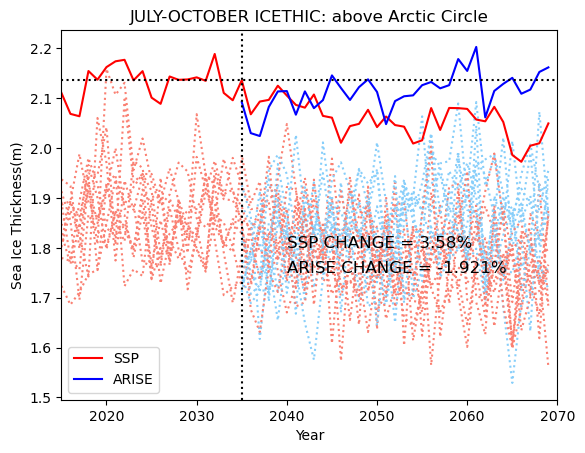

In [43]:
latmin3 = 64.5
latmax3 = 84.3
lonmin3 = 262.5
lonmax3 = 355 
latmin_ind = int(np.abs(latmin3-latIce).argmin()) #specifying what area I want to focus on
latmax_ind = int(np.abs(latmax3-latIce).argmin())
lonmin_ind = int(np.abs(lonmin3-lonIce).argmin())
lonmax_ind = int(np.abs(lonmax3-lonIce).argmin())
SSPicethicJASOTS = JASOmeanSSP[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping data to specified area
ARISEicethicJASOTS = JASOmeanARISE[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
landmaskTSJASOTS = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping landmask to specified area
lonmesh,latmesh = np.meshgrid(SSPicethicJASOTS.lon,SSPicethicJASOTS.lat)
weights3DsspJASOTS = np.zeros((SSPicethicJASOTS.shape[0],len(SSPicethicJASOTS.lat),len(SSPicethicJASOTS.lon)))
weights3DariseJASOTS = np.zeros((ARISEicethicJASOTS.shape[0],len(ARISEicethicJASOTS.lat),len(ARISEicethicJASOTS.lon)))
# print(len(SSPicethic.lat))
for iyear in range(SSPicethicJASOTS.shape[0]):
    SSPicethicJASOTS[iyear,:,:] = np.ma.MaskedArray(SSPicethicJASOTS[iyear,:,:], mask=(landmaskTSJASOTS==1))
    # print(SSPicethic[iyear,:,:].shape)
    weights3DsspJASOTS[iyear,:,:] = np.cos(np.deg2rad(latmesh))
    # print(len(weights3Dssp[0,:,20:25]))
    weights3DsspJASOTS[iyear,:,:][landmaskTSJASOTS==1] = np.nan
for iyear in range(ARISEicethicJASOTS.shape[0]):
    ARISEicethicJASOTS[iyear,:,:] = np.ma.MaskedArray(ARISEicethicJASOTS[iyear,:,:], mask=(landmaskTSJASOTS==1))
    weights3DariseJASOTS[iyear,:,:] = np.cos(np.deg2rad(latmesh))
    weights3DariseJASOTS[iyear,:,:][landmaskTSJASOTS==1] = np.nan
# print("weights:", weights3Dssp[0,:,20:25])
# print("landmask: ", landmask[:,20:25])
# print("data: ", SSPicethic[0,:,20:25])
# Annual time series 
SSPicethicJASO_masked = np.ma.MaskedArray(SSPicethicJASOTS, mask=np.isnan(SSPicethicJASOTS))
weightsSSPJASO = np.ma.asanyarray(weights3DsspJASOTS)
SSPicethicJASO_TS     = np.array([np.ma.average(
                                    SSPicethicJASO_masked[i],
                                    weights=weightsSSPJASO[i]
                                    ) for i in range((SSPicethicJASO_masked.shape)[0])])
ARISEicethicJASO_masked = np.ma.MaskedArray(ARISEicethicJASOTS, mask=np.isnan(ARISEicethicJASOTS))
weightsARISEJASO          = np.ma.asanyarray(weights3DariseJASOTS)
ARISEicethicJASO_TS     = np.array([np.ma.average(
                                    ARISEicethicJASO_masked[i],
                                    weights=weightsARISEJASO[i]
                                    ) for i in range((ARISEicethicJASO_masked.shape)[0])])
##FINDING % CHANGE:
print('SSP ICETHIC IN 2035=',SSPicethicJASO_TS[20])#avg icefrac at 2035 when we initiate SAI
print('SSP ICETHIC IN 2069=',SSPicethicJASO_TS[54])#in 2069
percentSSPchange = (SSPicethicJASO_TS[54] - SSPicethicJASO_TS[20])*100/SSPicethicJASO_TS[20]
print('CHANGE IN SSP ICETHIC=', percentSSPchange, str('%'))
print('ARISE ICETHIC IN 2035=',ARISEicethicJASO_TS[0])#avg icefrac at 2035 when we initiate SAI
print('ARISE ICETHIC IN 2069=',ARISEicethicJASO_TS[34])#in 2069
percentARISEchange = (ARISEicethicJASO_TS[34] - ARISEicethicJASO_TS[0])*100/ARISEicethicJASO_TS[0]
print('CHANGE IN ARISE ICETHIC=', percentARISEchange, str('%'))

for ensNum in range(len(ens)):
    latmin_ind = int(np.abs(latmin3-latIce).argmin()) #specifying what area I want to focus on
    latmax_ind = int(np.abs(latmax3-latIce).argmin())
    lonmin_ind = int(np.abs(lonmin3-lonIce).argmin())
    lonmax_ind = int(np.abs(lonmax3-lonIce).argmin())
    a = iceThicknessCONTROL[ens[ensNum]].sel(time=iceThicknessCONTROL[ens[ensNum]][:,:,:].time.dt.month.isin([7,8,9,10]))
    b = a.groupby('time.year').mean(dim='time', skipna = True)
    c = iceThicknessFEEDBACK[ens[ensNum]].sel(time=iceThicknessFEEDBACK[ens[ensNum]][:,:,:].time.dt.month.isin([7,8,9,10]))
    d = c.groupby('time.year').mean(dim='time', skipna = True)
    SSPicethicJASOTSens = b[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping data to specified area
    ARISEicethicJASOTSens = d[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
    landmaskTSJASOTSens = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping landmask to specified area
    lonmesh,latmesh = np.meshgrid(SSPicethicJASOTSens.lon,SSPicethicJASOTSens.lat)
    weights3DsspJASOTSens = np.zeros((SSPicethicJASOTSens.shape[0],len(SSPicethicJASOTSens.lat),len(SSPicethicJASOTSens.lon)))
    weights3DariseJASOTSens = np.zeros((ARISEicethicJASOTSens.shape[0],len(ARISEicethicJASOTSens.lat),len(ARISEicethicJASOTSens.lon)))
    # print(len(SSPicethic.lat))
    for iyear in range(SSPicethicJASOTSens.shape[0]):
        SSPicethicJASOTSens[iyear,:,:] = np.ma.MaskedArray(SSPicethicJASOTSens[iyear,:,:], mask=(landmaskTSJASOTSens==1))
        # print(SSPicethic[iyear,:,:].shape)
        weights3DsspJASOTSens[iyear,:,:] = np.cos(np.deg2rad(latmesh))
        # print(len(weights3Dssp[0,:,20:25]))
        weights3DsspJASOTSens[iyear,:,:][landmaskTSJASOTSens==1] = np.nan
    for iyear in range(ARISEicethicJASOTSens.shape[0]):
        ARISEicethicJASOTSens[iyear,:,:] = np.ma.MaskedArray(ARISEicethicJASOTSens[iyear,:,:], mask=(landmaskTSJASOTSens==1))
        weights3DariseJASOTSens[iyear,:,:] = np.cos(np.deg2rad(latmesh))
        weights3DariseJASOTSens[iyear,:,:][landmaskTSJASOTSens==1] = np.nan
    # print("weights:", weights3DsspSeptTSens[0,:,20:25])
    # print("landmask: ", landmaskTSSeptTS[:,20:25])
    # print("data: ", SSPicethicSeptTSens[0,:,20:25])
   
    SSPicethicJASOTSens_masked = np.ma.MaskedArray(SSPicethicJASOTSens, mask=np.isnan(SSPicethicJASOTSens))
    weightsSSPJASOTSens             = np.ma.asanyarray(weights3DsspJASOTSens)
    SSPicethicJASOens_TS     = np.array([np.ma.average(
                                        SSPicethicJASOTSens_masked[i],
                                        weights=weightsSSPJASOTSens[i]
                                        ) for i in range((SSPicethicJASOTSens_masked.shape)[0])])
    ARISEicethicJASOTSens_masked = np.ma.MaskedArray(ARISEicethicJASOTSens, mask=np.isnan(ARISEicethicJASOTSens))
    weightsARISEJASOTSens          = np.ma.asanyarray(weights3DariseJASOTSens)
    ARISEicethicJASOens_TS     = np.array([np.ma.average(
                                        ARISEicethicJASOTSens_masked[i],
                                        weights=weightsARISEJASOTSens[i]
                                        ) for i in range((ARISEicethicJASOTSens_masked.shape)[0])])
    plt.plot(SSPtimearray, SSPicethicJASOens_TS , color = 'salmon', linestyle=':')
    plt.plot(ARISEtimearray, ARISEicethicJASOens_TS, color = 'lightskyblue', linestyle=':')
    
plt.plot(SSPtimearray, SSPicethicJASO_TS , color = 'red', label='SSP')
plt.plot(ARISEtimearray, ARISEicethicJASO_TS, color = 'blue', label='ARISE')
plt.xlim(2015,2070)
# plt.ylim(1,1.8)
plt.xlabel('Year')
plt.ylabel('Sea Ice Thickness(m)')
plt.title('JULY-OCTOBER ICETHIC: above Arctic Circle')
plt.axvline(x=2035, linestyle = ':', color = 'black')
plt.axhline(y=SSPicethicJASO_TS[20], linestyle = ':', color = 'black')
plt.legend()
plt.text(2040, 1.8, 'SSP CHANGE = 3.58%', fontsize = 12)
plt.text(2040, 1.75, 'ARISE CHANGE = -1.921%', fontsize = 12)